# AMCAT Data Analysis
- AMCAT (Aspiring Minds Computer Adaptive Test) is an employability assessment test used by companies to evaluate the job-readiness of candidates. The test assesses various skills such as aptitude, technical knowledge, and communication skills.

## Problem Statement :
- Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.”
- Test this claim with the data given to you.
-  Is there a relationship between gender and specialization? (i.e. Does the preference of Specialization depend on the Gender?)


##  Objective :

- Explore and analyze the dataset to determine if there is a relationship between gender and specialization? (i.e. Does the preference of Specialization depend on the Gender?)

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime as dt

In [2]:
# Loading the dataset
df = pd.read_csv("data.xlsx - Sheet1.csv")

In [3]:
## checking the dimensions of dataset
df.shape

(3998, 39)

In [4]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [5]:
#There is an unnamed column and we cannot use this for data analysis. So we need to drop that column. 
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df.head(5)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

In [8]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [9]:
df.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

## Dataset consists of
- 27 Numerical columns
- 9 catogorical columns
- 2 datetime

## Data Cleaning

In [10]:
### finding the anomolities in data
for i in df.columns:
    print('*'*20,i,'*'*20)
    print(df[i].unique())

******************** ID ********************
[203097 579905 810601 ... 355888 947111 324966]
******************** Salary ********************
[ 420000.  500000.  325000. 1100000.  200000.  300000.  400000.  600000.
  230000.  450000.  270000.  350000.  250000.  120000.  320000.  190000.
  180000.  335000.  435000.  345000.  145000.  220000.  530000.  340000.
  360000.  215000.   80000.  330000.  380000.  110000.  205000.   95000.
  390000.   60000.  240000.  525000.  305000.  150000.  310000.  455000.
  800000.  100000.  280000.  445000.  315000.  370000.  275000. 1500000.
  425000.  470000.  460000.  510000.  480000.  170000.  640000.  225000.
  440000. 1200000.  675000.  105000.  195000.  385000.  235000.  615000.
  290000.  140000.  405000. 1860000.  375000.  430000.  660000.   70000.
  410000.  550000.   35000.  115000.  415000.  265000.  285000.  245000.
  395000.  560000.  700000.  185000.  160000.  625000.   85000.  135000.
  785000.  210000.  155000.  355000.  535000.  690000. 

## Observations of the columns(regarding cleaning and missing values):
- 1.We can see the DOJ,DOL,DOB are given in timestamp format
- 2.Job city column contains -1 values which are NaN equivalents.
- 3.10 board column contain 0 value which is missing value
- 4.12 board column contain 0 value which is missing value
- 5.college state column contain 'union teritory' which is not a specific state
- 6.Graduation year column contain 0 which is a missing value
- 7.Domain column contain -1 which is a missing value


In [11]:
### We can see the DOJ and DOL are given in timestamp format. Converting timestamp into date using datetime module.
## In DOL column,We can see the value 'present'. We will convert this into the present date for our analysis.

df["DOJ"]=pd.to_datetime(df["DOJ"]).dt.date
df["DOL"].replace("present",dt.datetime.today(),inplace=True)
df['DOL'] = pd.to_datetime(df['DOL']).dt.date

## Converting feature from DOJ and DOL as we are only concerned with how many years the person has worked in the organisation.
df['Experience'] = pd.to_datetime(df["DOL"]).dt.year - pd.to_datetime(df['DOJ']).dt.year

## Converting DOB column from timestamp to year
df['DOB'] = pd.to_datetime(df['DOB']).dt.year

In [12]:
df.head(5)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience
0,203097,420000.0,2012-06-01,2024-02-23,senior quality engineer,Bangalore,f,1990,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,12
1,579905,500000.0,2013-09-01,2024-02-23,assistant manager,Indore,m,1989,85.4,cbse,...,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,11
2,810601,325000.0,2014-06-01,2024-02-23,systems engineer,Chennai,f,1992,85.0,cbse,...,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,10
3,267447,1100000.0,2011-07-01,2024-02-23,senior software engineer,Gurgaon,m,1989,85.6,cbse,...,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,13
4,343523,200000.0,2014-03-01,2015-03-01,get,Manesar,m,1991,78.0,cbse,...,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1


In [13]:
(df==0).astype(int).sum(axis=0)

ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier          2797
CollegeState                0
GraduationYear              1
English                     0
Logical                     0
Quant                       0
Domain                      0
ComputerProgramming         0
ElectronicsAndSemicon       0
ComputerScience             0
MechanicalEngg              0
ElectricalEngg              0
TelecomEngg                 0
CivilEngg                   0
conscienti

In [14]:
df.isin([-1, 'NaN']).sum()

ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscienti

In [15]:
branch=['ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']

In [16]:
for i in branch:
    df[i]=df[i].replace(-1,np.nan)

## Dropping columns

In [17]:
df.drop(columns=['CollegeID','CollegeCityID','CollegeCityTier'],axis=1,inplace=True)

In [18]:
df.describe(include='object')

,DOJ,DOL,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState
count,3998,3998,3998,3998,3998,3998,3998,3998,3998,3998
unique,81,67,419,339,2,275,340,4,46,26
top,2014-07-01,2024-02-23,software engineer,Bangalore,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh
freq,199,1875,539,627,3041,1395,1400,3700,880,915


In [19]:
df.describe(include='number')

,ID,Salary,DOB,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,GraduationYear,English,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,235.000000,161.000000,374.000000,42.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,1990.427464,77.925443,2008.087544,74.466366,1.925713,71.486171,2012.105803,501.649075,...,406.876596,433.037267,350.173797,349.666667,-0.037831,0.146496,0.002763,-0.169033,-0.138110,5.755128
std,3.632182e+05,2.127375e+05,1.767473,9.850162,1.653599,10.999933,0.262270,8.167338,31.857271,104.940021,...,84.894993,98.515537,75.661864,79.784670,1.028666,0.941782,0.951471,1.007580,1.008075,4.789783
min,1.124400e+04,3.500000e+04,1977.000000,43.000000,1995.000000,40.000000,1.000000,6.450000,0.000000,180.000000,...,180.000000,206.000000,153.000000,166.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700,0.000000
25%,3.342842e+05,1.800000e+05,1989.000000,71.680000,2007.000000,66.000000,2.000000,66.407500,2012.000000,425.000000,...,362.000000,366.000000,287.500000,292.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200,1.000000
50%,6.396000e+05,3.000000e+05,1991.000000,79.150000,2008.000000,74.400000,2.000000,71.720000,2013.000000,500.000000,...,407.000000,433.000000,356.000000,348.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300,3.000000
75%,9.904800e+05,3.700000e+05,1992.000000,85.670000,2009.000000,82.600000,2.000000,76.327500,2014.000000,570.000000,...,446.000000,500.000000,393.000000,388.000000,0.702700,0.812800,0.672000,0.526200,0.502400,10.000000
max,1.298275e+06,4.000000e+06,1997.000000,97.760000,2013.000000,98.700000,2.000000,99.930000,2017.000000,875.000000,...,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400,33.000000


In [20]:
col = list(df.select_dtypes(include='number').columns)


In [21]:
col

['ID',
 'Salary',
 'DOB',
 '10percentage',
 '12graduation',
 '12percentage',
 'CollegeTier',
 'collegeGPA',
 'GraduationYear',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience',
 'Experience']

In [22]:
out_dict={}
for i in col:
    Q1 = df[i].quantile(0.05)
    Q3 = df[i].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
    out_dict[i]=outliers

In [23]:
len_out={}
for i in col:
    Q1 = df[i].quantile(0.05)
    Q3 = df[i].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
    len_out[i]=len(outliers)

In [24]:
col1 = list(df.select_dtypes(include='object').columns)

In [25]:
col1

['DOJ',
 'DOL',
 'Designation',
 'JobCity',
 'Gender',
 '10board',
 '12board',
 'Degree',
 'Specialization',
 'CollegeState']

## Column: '10-board'
This column has missing values in the form of '0'.

In [26]:
df['10board'].value_counts()

cbse                          1395
state board                   1164
0                              350
icse                           281
ssc                            122
                              ... 
hse,orissa                       1
national public school           1
nagpur board                     1
jharkhand academic council       1
bse,odisha                       1
Name: 10board, Length: 275, dtype: int64

In [27]:
df['10board']=df['10board'].replace('0','N/A')

In [28]:
df['10board'].value_counts()

cbse                          1395
state board                   1164
N/A                            350
icse                           281
ssc                            122
                              ... 
hse,orissa                       1
national public school           1
nagpur board                     1
jharkhand academic council       1
bse,odisha                       1
Name: 10board, Length: 275, dtype: int64

In [29]:
board10=list(df['10board'].unique())

In [30]:
state_10=[]
cbse_10=[]
icse_10=[]
for i in board10:
    if i in ('cbse','cbse[gulf_zone]','cbse ','cbsc','new delhi','board of secondary education'):
        cbse_10.append(i)
    elif i in ('icse','icse board','cicse'):
        icse_10.append(i)
    else:
        state_10.append(i)

In [31]:
for i in state_10:
    df['10board'].replace(i,'State',inplace=True)
for i in cbse_10:
    df['10board'].replace(i,'CBSE',inplace=True)
for i in icse_10:
    df['10board'].replace(i,'ICSE',inplace=True)

In [32]:
df['10board'].value_counts()

State    2298
CBSE     1417
ICSE      283
Name: 10board, dtype: int64

## Column: '12-board'
This column has missing values in the form of '0'.

In [33]:
df['12board'].value_counts()

cbse                                1400
state board                         1254
0                                    359
icse                                 129
up board                              87
                                    ... 
jawahar higher secondary school        1
nagpur board                           1
bsemp                                  1
board of higher secondary orissa       1
boardofintermediate                    1
Name: 12board, Length: 340, dtype: int64

In [34]:
df['12board']=df['12board'].replace('0','N/A')

In [35]:
board12=list(df['12board'].unique())

In [36]:
state_12=[]
cbse_12=[]
icse_12=[]
for i in board12:
    if i in ('cbse','cbese ','cbsc','new delhi','cbse board','bice'):
        cbse_12.append(i)
    elif i in ('icse','ise board','cicse','isce','isc'):
        icse_12.append(i)
    else:
        state_12.append(i)

In [37]:
for i in state_12:
    df['12board'].replace(i,'State',inplace=True)
for i in cbse_12:
    df['12board'].replace(i,'CBSE',inplace=True)
for i in icse_12:
    df['12board'].replace(i,'ICSE',inplace=True)

In [38]:
df['12board'].value_counts()

State    2419
CBSE     1403
ICSE      176
Name: 12board, dtype: int64

## Column : 'Designation'
Designation Column has 'get' value which is a not a desired value.We should clean this and can be imputed with mode of the column.

In [39]:
df["Designation"].value_counts()

software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 419, dtype: int64

In [40]:
df["Designation"].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

In [41]:
# Filter out rows where "Designation" is 'get'
get_designations = df[df["Designation"] == 'get']

# Print the filtered DataFrame
print(get_designations)

           ID     Salary         DOJ         DOL Designation    JobCity  \
4      343523   200000.0  2014-03-01  2015-03-01         get    Manesar   
332    597966   180000.0  2013-08-01  2014-03-01         get         -1   
350     38162   340000.0  2010-07-01  2011-05-01         get  Faridabad   
1717   330551   145000.0  2012-10-01  2013-01-01         get  Hyderabad   
1897  1064862   175000.0  2014-05-01  2024-02-23         get  Hyderabad   
2140   796296   600000.0  2014-06-01  2024-02-23         get     Indore   
2318  1094242   220000.0  2014-07-01  2024-02-23         get    Lucknow   
2443  1259589   110000.0  2014-10-01  2015-04-01         get  kharagpur   
2666   110817   200000.0  2010-03-01  2011-03-01         get  Hyderabad   
2757  1083682   350000.0  2015-01-01  2024-02-23         get     Nashik   
3045    35694   180000.0  2013-01-01  2013-12-01         get  Sahibabad   
3126    87319  1210000.0  2010-10-01  2011-09-01         get     Bhopal   
3594   967009   280000.0 

In [42]:
df[df["Designation"]=="get"][['Designation','JobCity','Salary','Specialization']]

,Designation,JobCity,Salary,Specialization
4,get,Manesar,200000.0,electronics and communication engineering
332,get,-1,180000.0,mechanical and automation
350,get,Faridabad,340000.0,electrical engineering
1717,get,Hyderabad,145000.0,mechanical engineering
1897,get,Hyderabad,175000.0,mechanical engineering
2140,get,Indore,600000.0,mechanical engineering
2318,get,Lucknow,220000.0,electronics and electrical engineering
2443,get,kharagpur,110000.0,mechanical engineering
2666,get,Hyderabad,200000.0,electronics and electrical engineering
2757,get,Nashik,350000.0,mechanical engineering


### We can see that most of people whose Designation is unknown are from mechanical domain(70%) and ECE(30%).
### So we can pick the mode of designation for people belonging to mechanical and  electrical domain. And impute it with get value.

In [43]:
#for people with mechanical engineering
Mech = df[df['Specialization'].isin(['mechanical engineering','mechanical and automation'])]['Designation'].mode()[0]

#for people with electronics and electrical engineering
EEE = df[df['Specialization']==('electronics and electrical engineering')]['Designation'].mode()[0]

print(f'mode for mechanical:  {Mech}\nmode for EEE:  {EEE}')

mode for mechanical:  production engineer
mode for EEE:  system engineer


In [44]:
# Now we will impute the 'get' of designation with modes of the respective domains

#For mechanical domain
df.loc[df['Specialization'].isin(['mechanical engineering','mechanical and automation']),'Designation'].replace('get',Mech,inplace=True)

#for EEE domain
df['Designation'].replace('get',EEE,inplace=True)

## Column : 'Jobcity'
Jobcity contains missing values(-1). We need to treat this by using mode.

In [45]:
df['JobCity']

0              Bangalore
1                 Indore
2                Chennai
3                Gurgaon
4                Manesar
              ...       
3993          New Delhi 
3994           Hyderabad
3995           Bangalore
3996    Asifabadbanglore
3997             Chennai
Name: JobCity, Length: 3998, dtype: object

In [46]:
!pip install  fuzzywuzzy

In [47]:
from fuzzywuzzy import process

def correct_spelling_errors(target_word="", choices=[], threshold=80):
    match, score = process.extractOne(target_word, choices)
    if score >= threshold:
        return match
    else:
        return target_word

In [48]:
choices = ["Bangalore","Indore","Chennai","Gurgaon","Hyderabad","Kolkata","Pune","Noida","Mohali","Jhansi","Delhi","Bhubaneswar",
           "Mumbai","Mangalore","Rewari","Gaziabad","Bhiwadi","Mysore","Rajkot","Jaipur","Thane","Maharajganj","Thiruvananthapuram",
           "Punchkula","Coimbatore","Dhanbad","Lucknow","Gandhi Nagar","Unnao","Daman and Diu","Visakhapatnam","Nagpur","Bhagalpur",
           "Jaisalmer","Ahmedabad","Kochi/Cochin","Bankura","Kanpur","Vijayawada","Beawar","Alwar","Siliguri","Raipur","Bhopal",
           "Faridabad","Jodhpur","Udaipur","Muzaffarpur","Bulandshahar","Haridwar","Raigarh","Aurangabad","Belgaum","Dehradun",
           "Rudrapur","Jamshedpur","Dharamshala","Hissar","Ranchi","Chandigarh","Australia","Cheyyar","sonepat","Pantnagar","Jagdalpur",
           "Angul","Karad","Rajpura","Pilani","Ambala City","Gorakhpur","Patiala","Sambalpur","Haldia","Karnal","Vellore","Dausa",
           "Rourkela","Guwahati","Mohali","Phagwara","Baripada","Meerut","Yamuna Nagar","Shahibabad","Pondichery","Ras Al Khaimah",
           "Jalandhar","Manesar","vapi","Allahabad","Khopoli","Keral","Howrah","Patna","Nellore","Varanasi","Kakinada","Rayagada",
           "Bahadurgarh","Kota","Bhilai","Kolhapur","Surat","Durgapur","Mettur","Nagari","Johannesburg","Bathinda","Joshimath","Kharagpur",
           "London","Kurnool","Tirupati","Bhopal","Jeddah","Nalagarh","Jhajjar","Gulbarga","Muvattupuzha","Shimla","'Bilaspur",
           "Chandrapur","Nanded","Dharmapuri","Vandavasi","Rohtak","Asansol","Tirunelvelli","Ernakulam","Baroda","Ariyalur","Jowai",
           "Neemrana","Dubai","Ahmednagar","Nashik","Bellary","Ludhiana","Gagret","Indirapuram","Gwalior","Hospete","Miryalaguda",
           "Ganjam","Dharuhera","Hubli","Agra","kudankulam","Ongole","Bikaner","Jammu","Al Jubail","Kalmar","Sweden","Jaspur","Burdwan",
           "Shahdol","NCR-Delhi","Vizag"]

In [49]:
df['JobCity'] = df['JobCity'].apply(lambda city: correct_spelling_errors(str(city), choices))

In [50]:
df['JobCity'].nunique()

196

In [51]:
df["JobCity"].replace("Bengaluru","Bangalore",inplace=True)

In [54]:
df['JobCity']=df['JobCity'].replace('-1','N/A')

In [55]:
df['JobCity'].value_counts()

Bangalore       685
N/A             461
Noida           420
Hyderabad       371
Pune            327
               ... 
Nanded            1
Ernakulam         1
Tirunelvelli      1
Asansol           1
haryana           1
Name: JobCity, Length: 195, dtype: int64

## Specialization column

In [56]:
df['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [57]:
df['Specialization'].value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

In [58]:
specialization_map = \
{'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'EL',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'EL',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'EL',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}

In [59]:
df['Specialization'] = df['Specialization'].map(specialization_map)
df['Specialization'].unique()

array(['CS', 'EC', 'ME', 'EL', 'CE', 'other'], dtype=object)

## Column : 'Domain'

In [60]:
df['Domain'].value_counts()

-1.000000    246
 0.622643    113
 0.538387    110
 0.486747    106
 0.744758    103
            ... 
 0.999250      1
 0.010995      1
 0.639587      1
 0.031150      1
 0.938588      1
Name: Domain, Length: 243, dtype: int64

## This column has missing values in form of -1

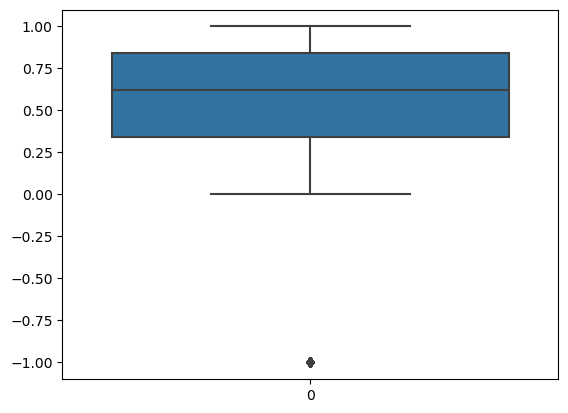

In [61]:
sns.boxplot(df['Domain'])
plt.show()

In [62]:
## As we can see outlier,it is better to use median to replace the missing values.
df['Domain'].replace(-1,df['Domain'].median(),inplace=True)
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience
0,203097,420000.0,2012-06-01,2024-02-23,senior quality engineer,Bangalore,f,1990,84.3,State,...,NaN,NaN,NaN,NaN,0.9737,0.8128,0.5269,1.35490,-0.4455,12
1,579905,500000.0,2013-09-01,2024-02-23,assistant manager,Indore,m,1989,85.4,CBSE,...,NaN,NaN,NaN,NaN,-0.7335,0.3789,1.2396,-0.10760,0.8637,11
2,810601,325000.0,2014-06-01,2024-02-23,systems engineer,Chennai,f,1992,85.0,CBSE,...,NaN,NaN,NaN,NaN,0.2718,1.7109,0.1637,-0.86820,0.6721,10
3,267447,1100000.0,2011-07-01,2024-02-23,senior software engineer,Gurgaon,m,1989,85.6,CBSE,...,NaN,NaN,NaN,NaN,0.0464,0.3448,-0.3440,-0.40780,-0.9194,13
4,343523,200000.0,2014-03-01,2015-03-01,system engineer,Manesar,m,1991,78.0,CBSE,...,NaN,NaN,NaN,NaN,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1


# Univariate

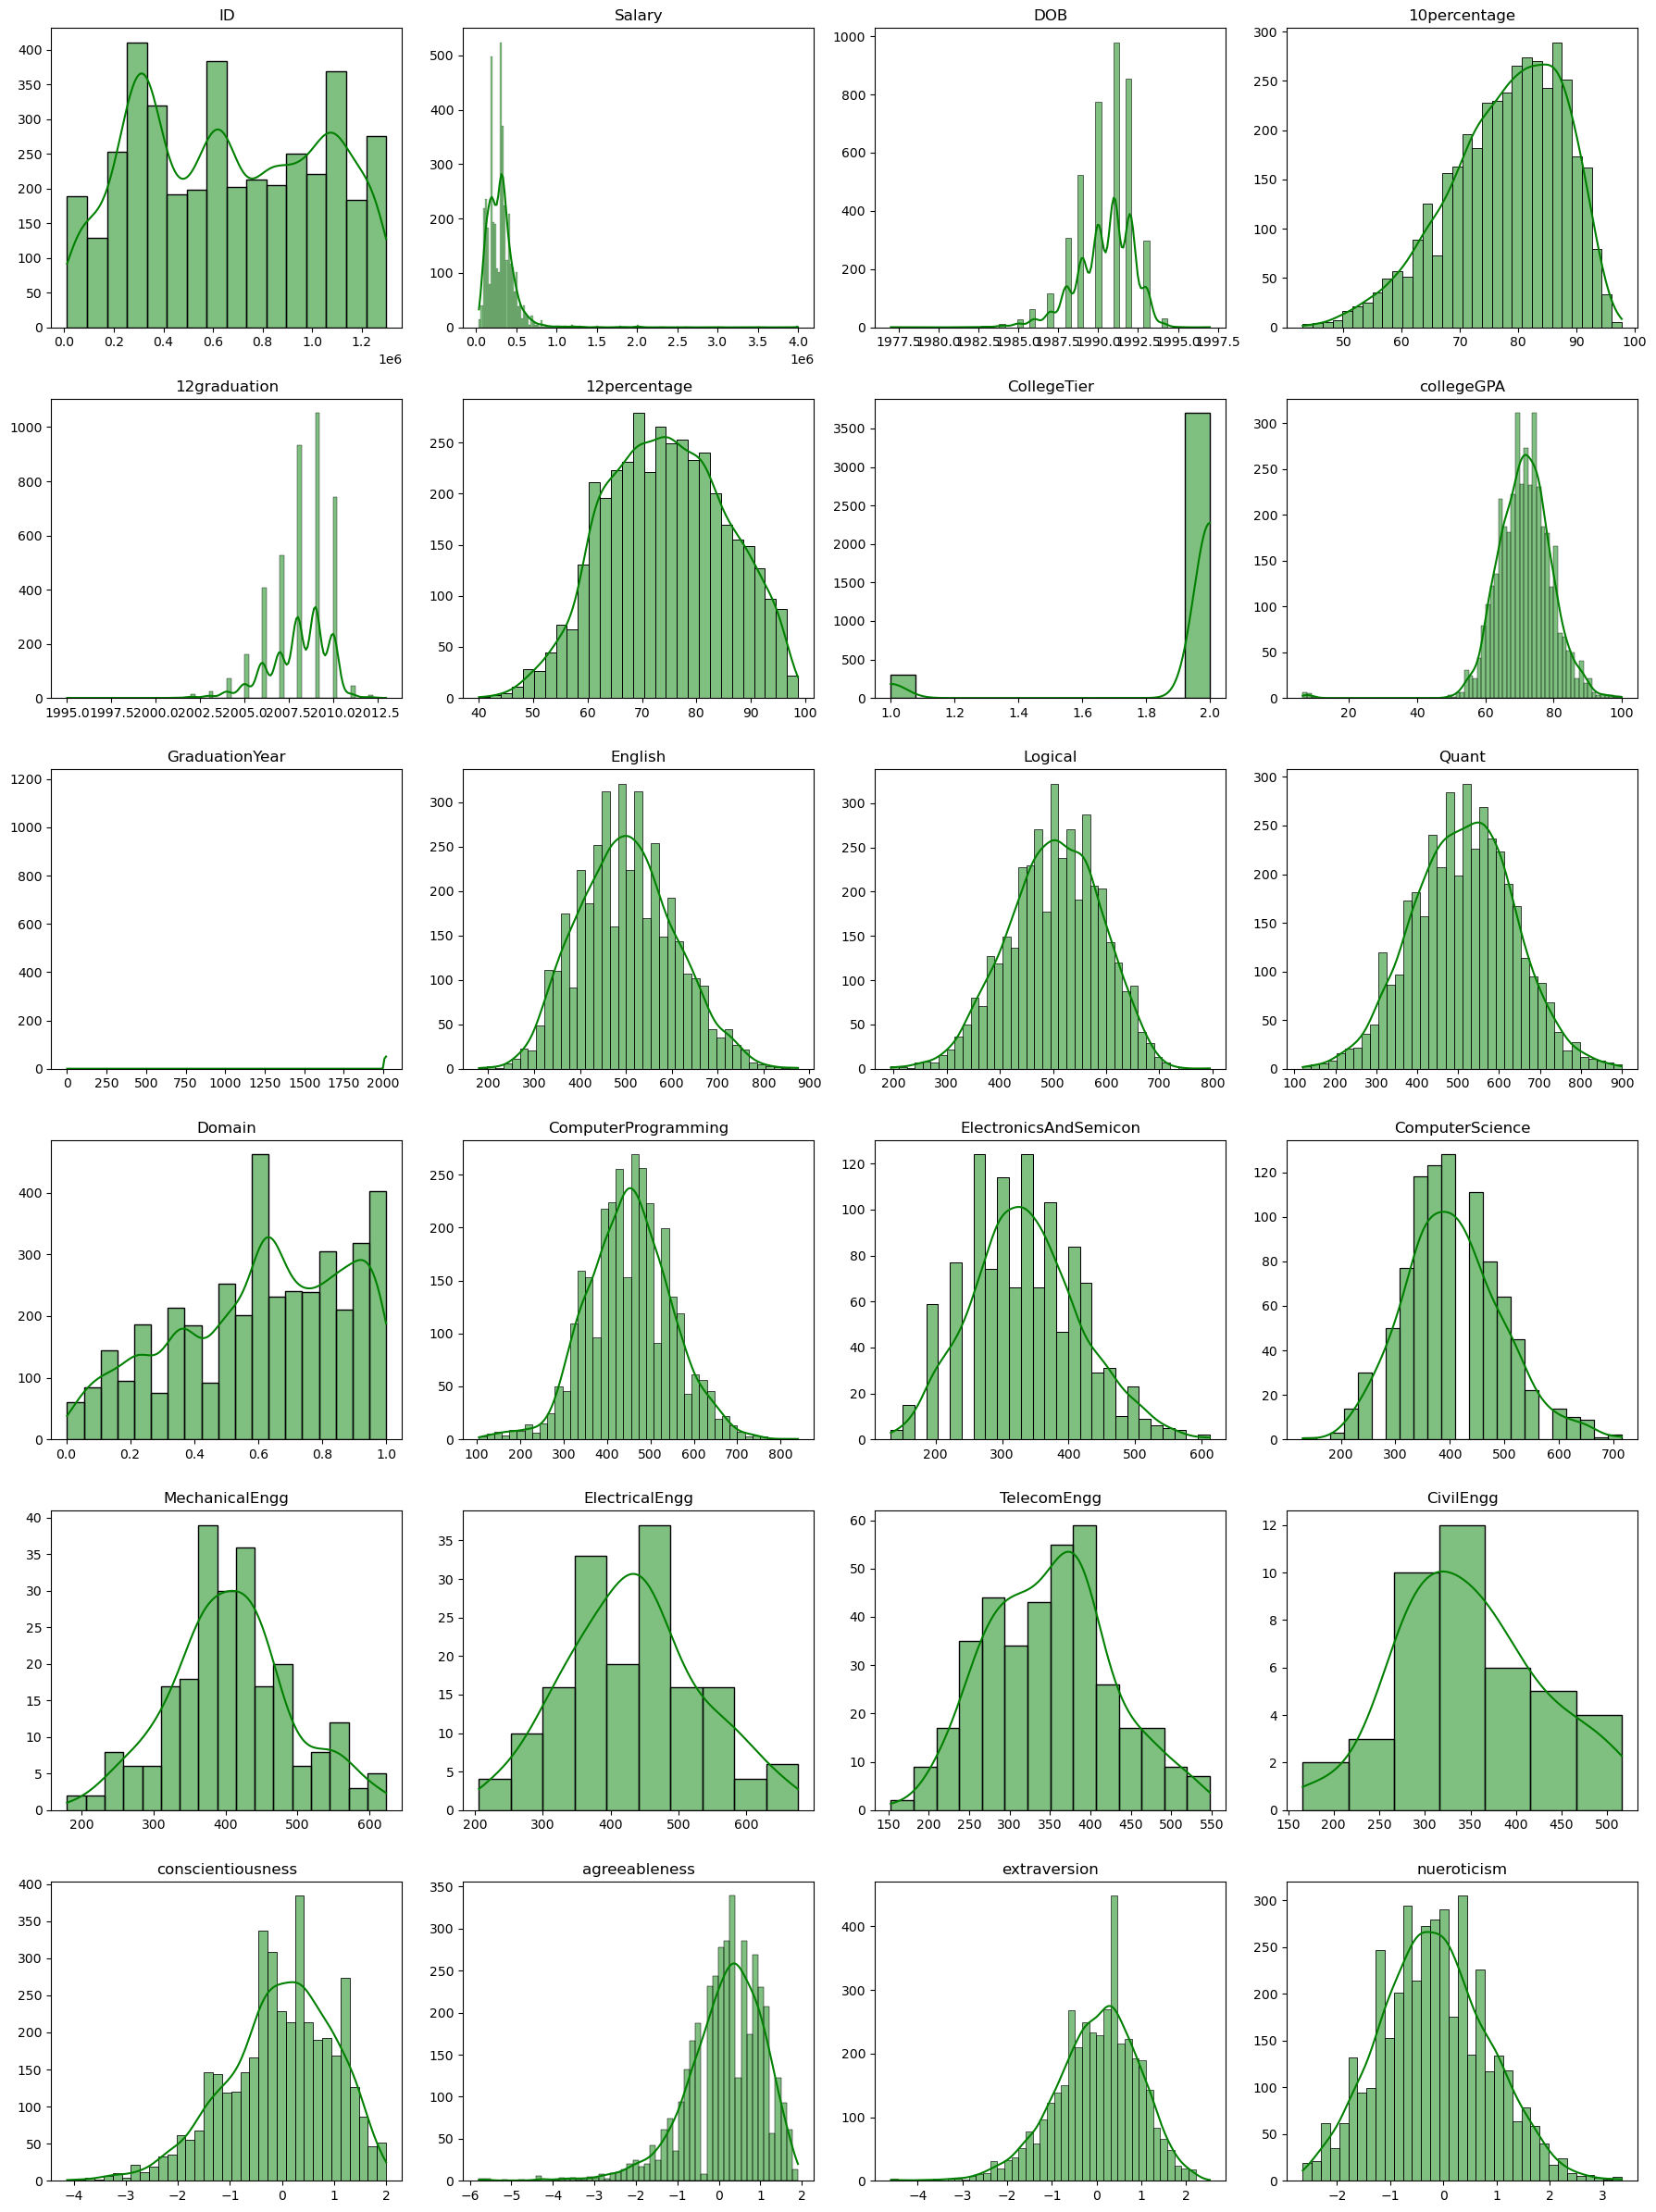

In [63]:
fig, axes = plt.subplots(6, 4, figsize=(18, 24))
axes = axes.flatten()

num_plots = min(len(col), len(axes))

for i, column in enumerate(col[:num_plots]):
    sns.histplot(data=df[column], ax=axes[i], kde=True, color='green', alpha=0.5)
    axes[i].set_title(column)  # Set subplot title
    axes[i].set_facecolor('white')
    axes[i].set_xlabel('')  # Remove x-axis label to improve clarity
    axes[i].set_ylabel('')  # Remove y-axis label to improve clarity

# Hide empty subplots
for ax in axes[num_plots:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

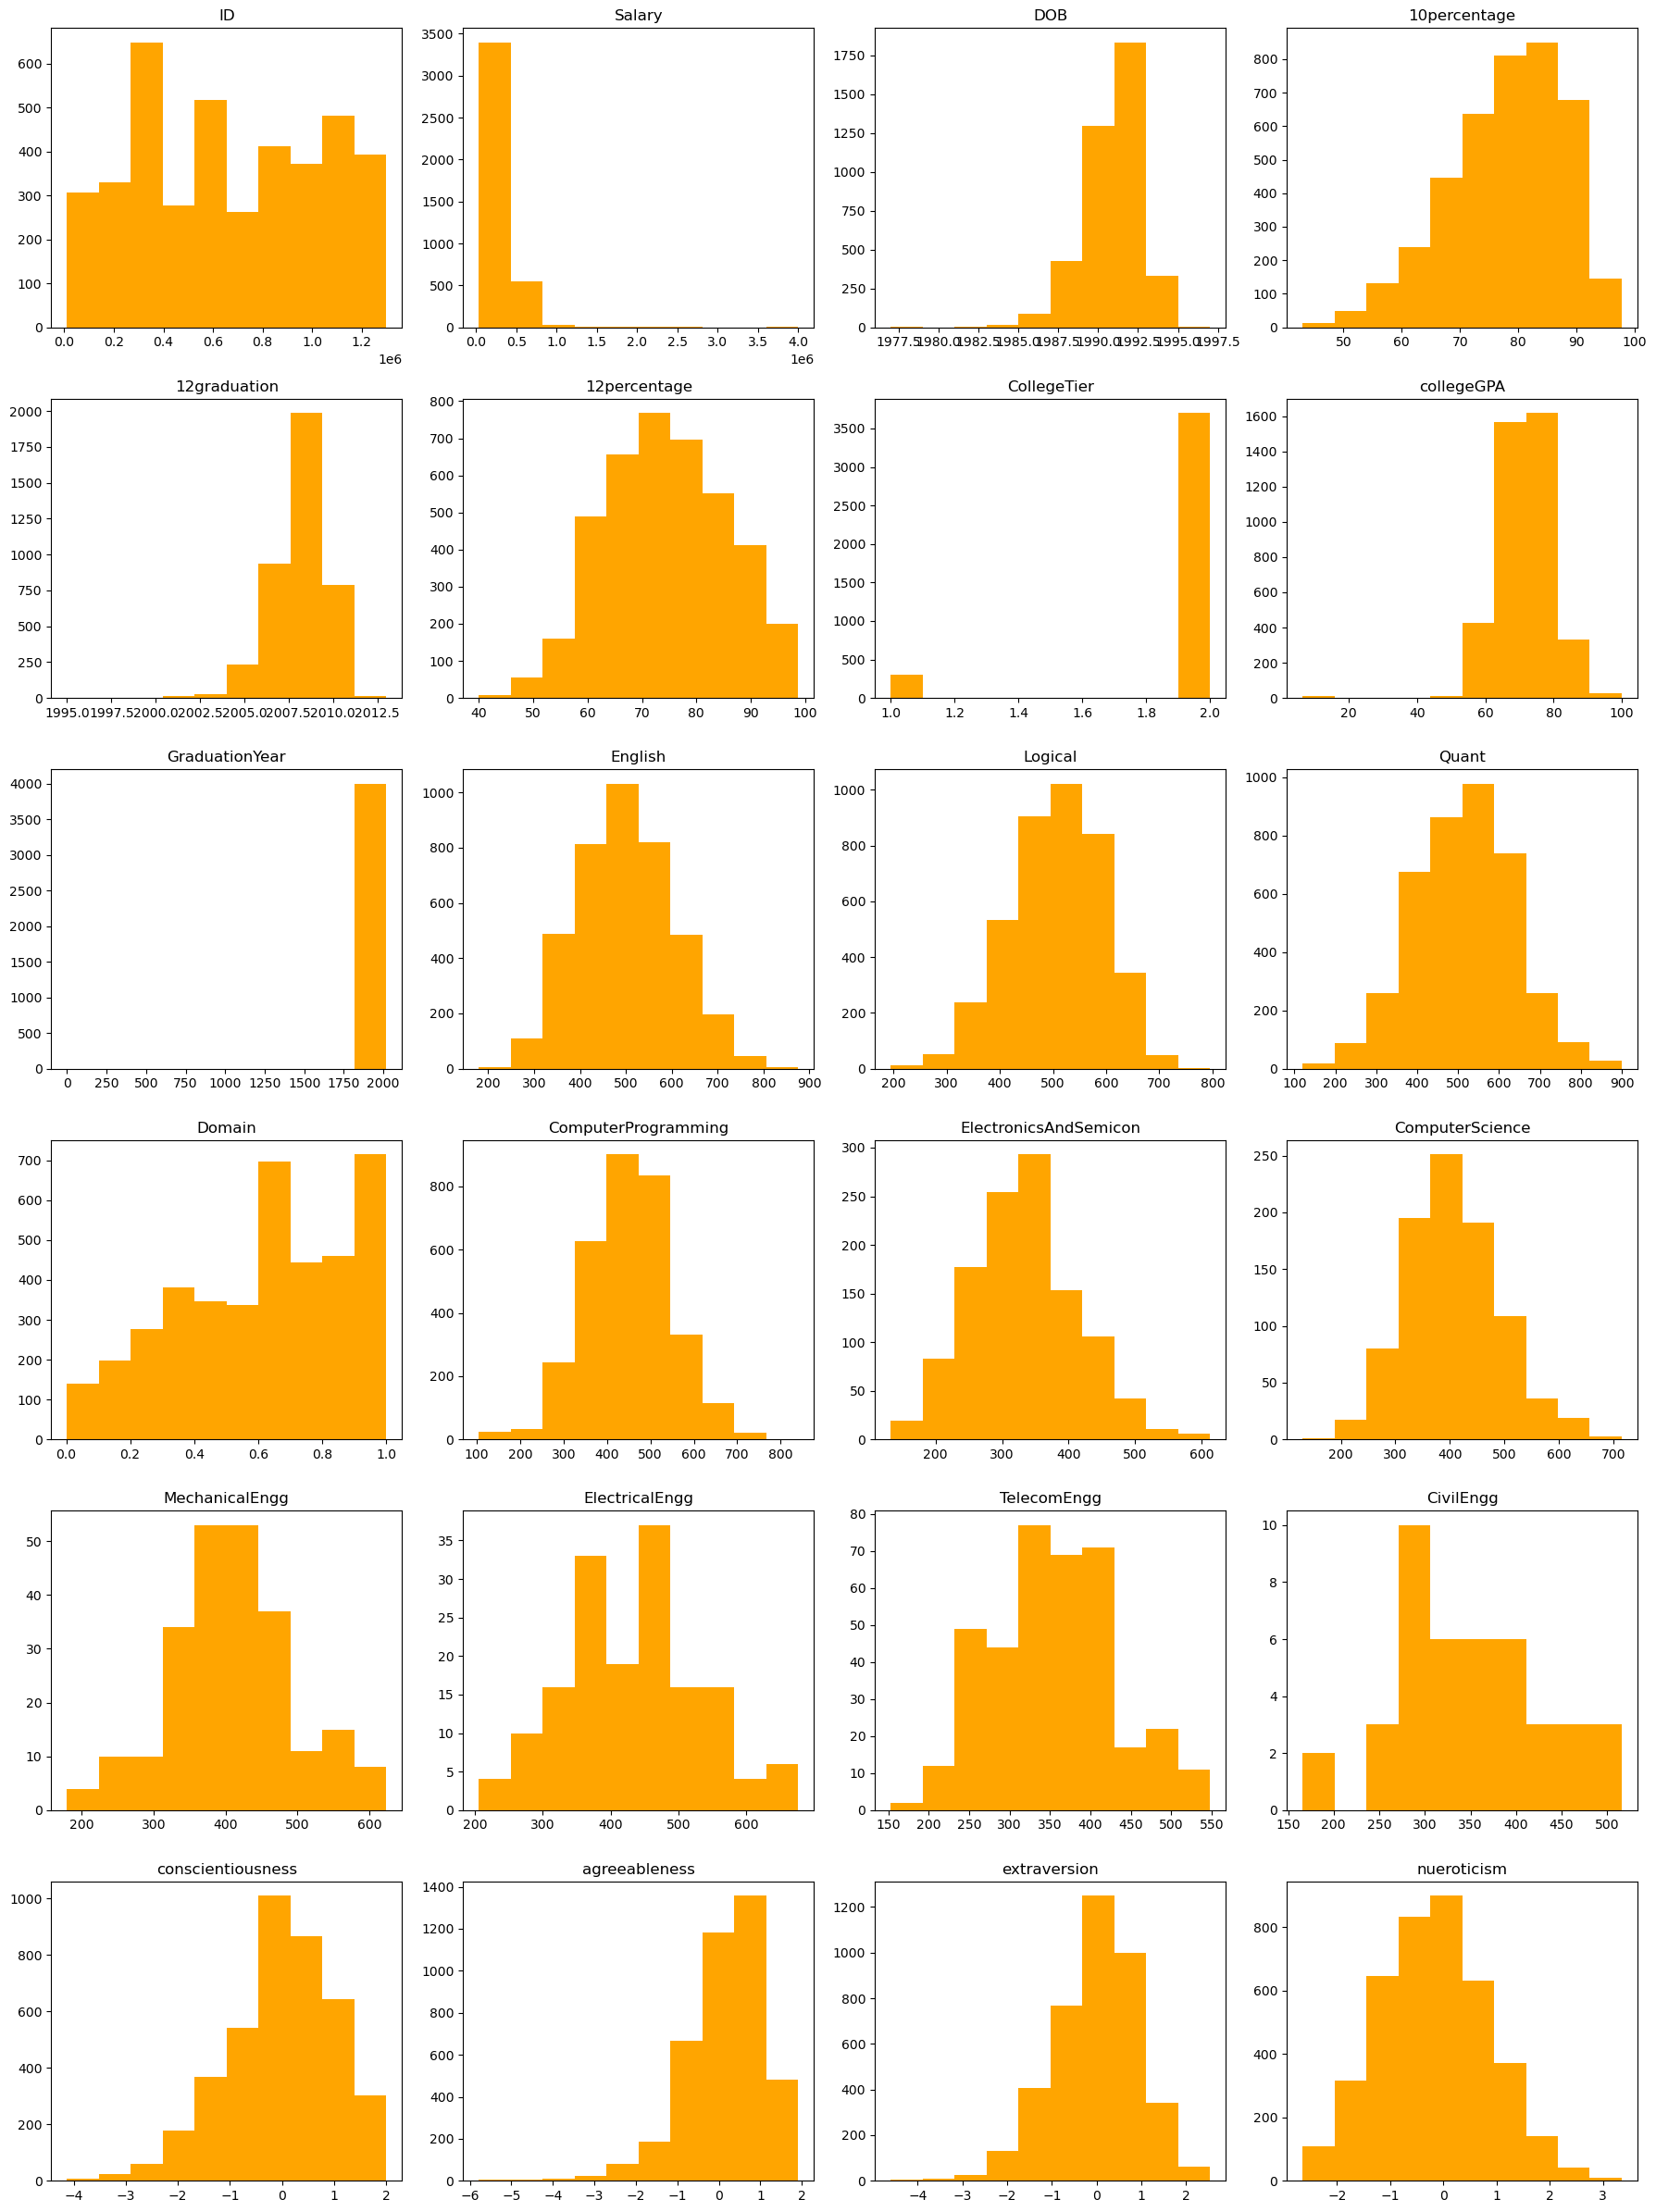

In [64]:

fig, axes = plt.subplots(6, 4, figsize=(18, 24))
axes = axes.flatten()

# Ensure the number of columns does not exceed the number of subplots
num_plots = min(len(col), len(axes))

for i, column in enumerate(col[:num_plots]):
    axes[i].hist(df[column], bins=10, color='orange')  # Change the color to 'yellow'
    axes[i].set_title(column)

# Hide empty subplots
for ax in axes[num_plots:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


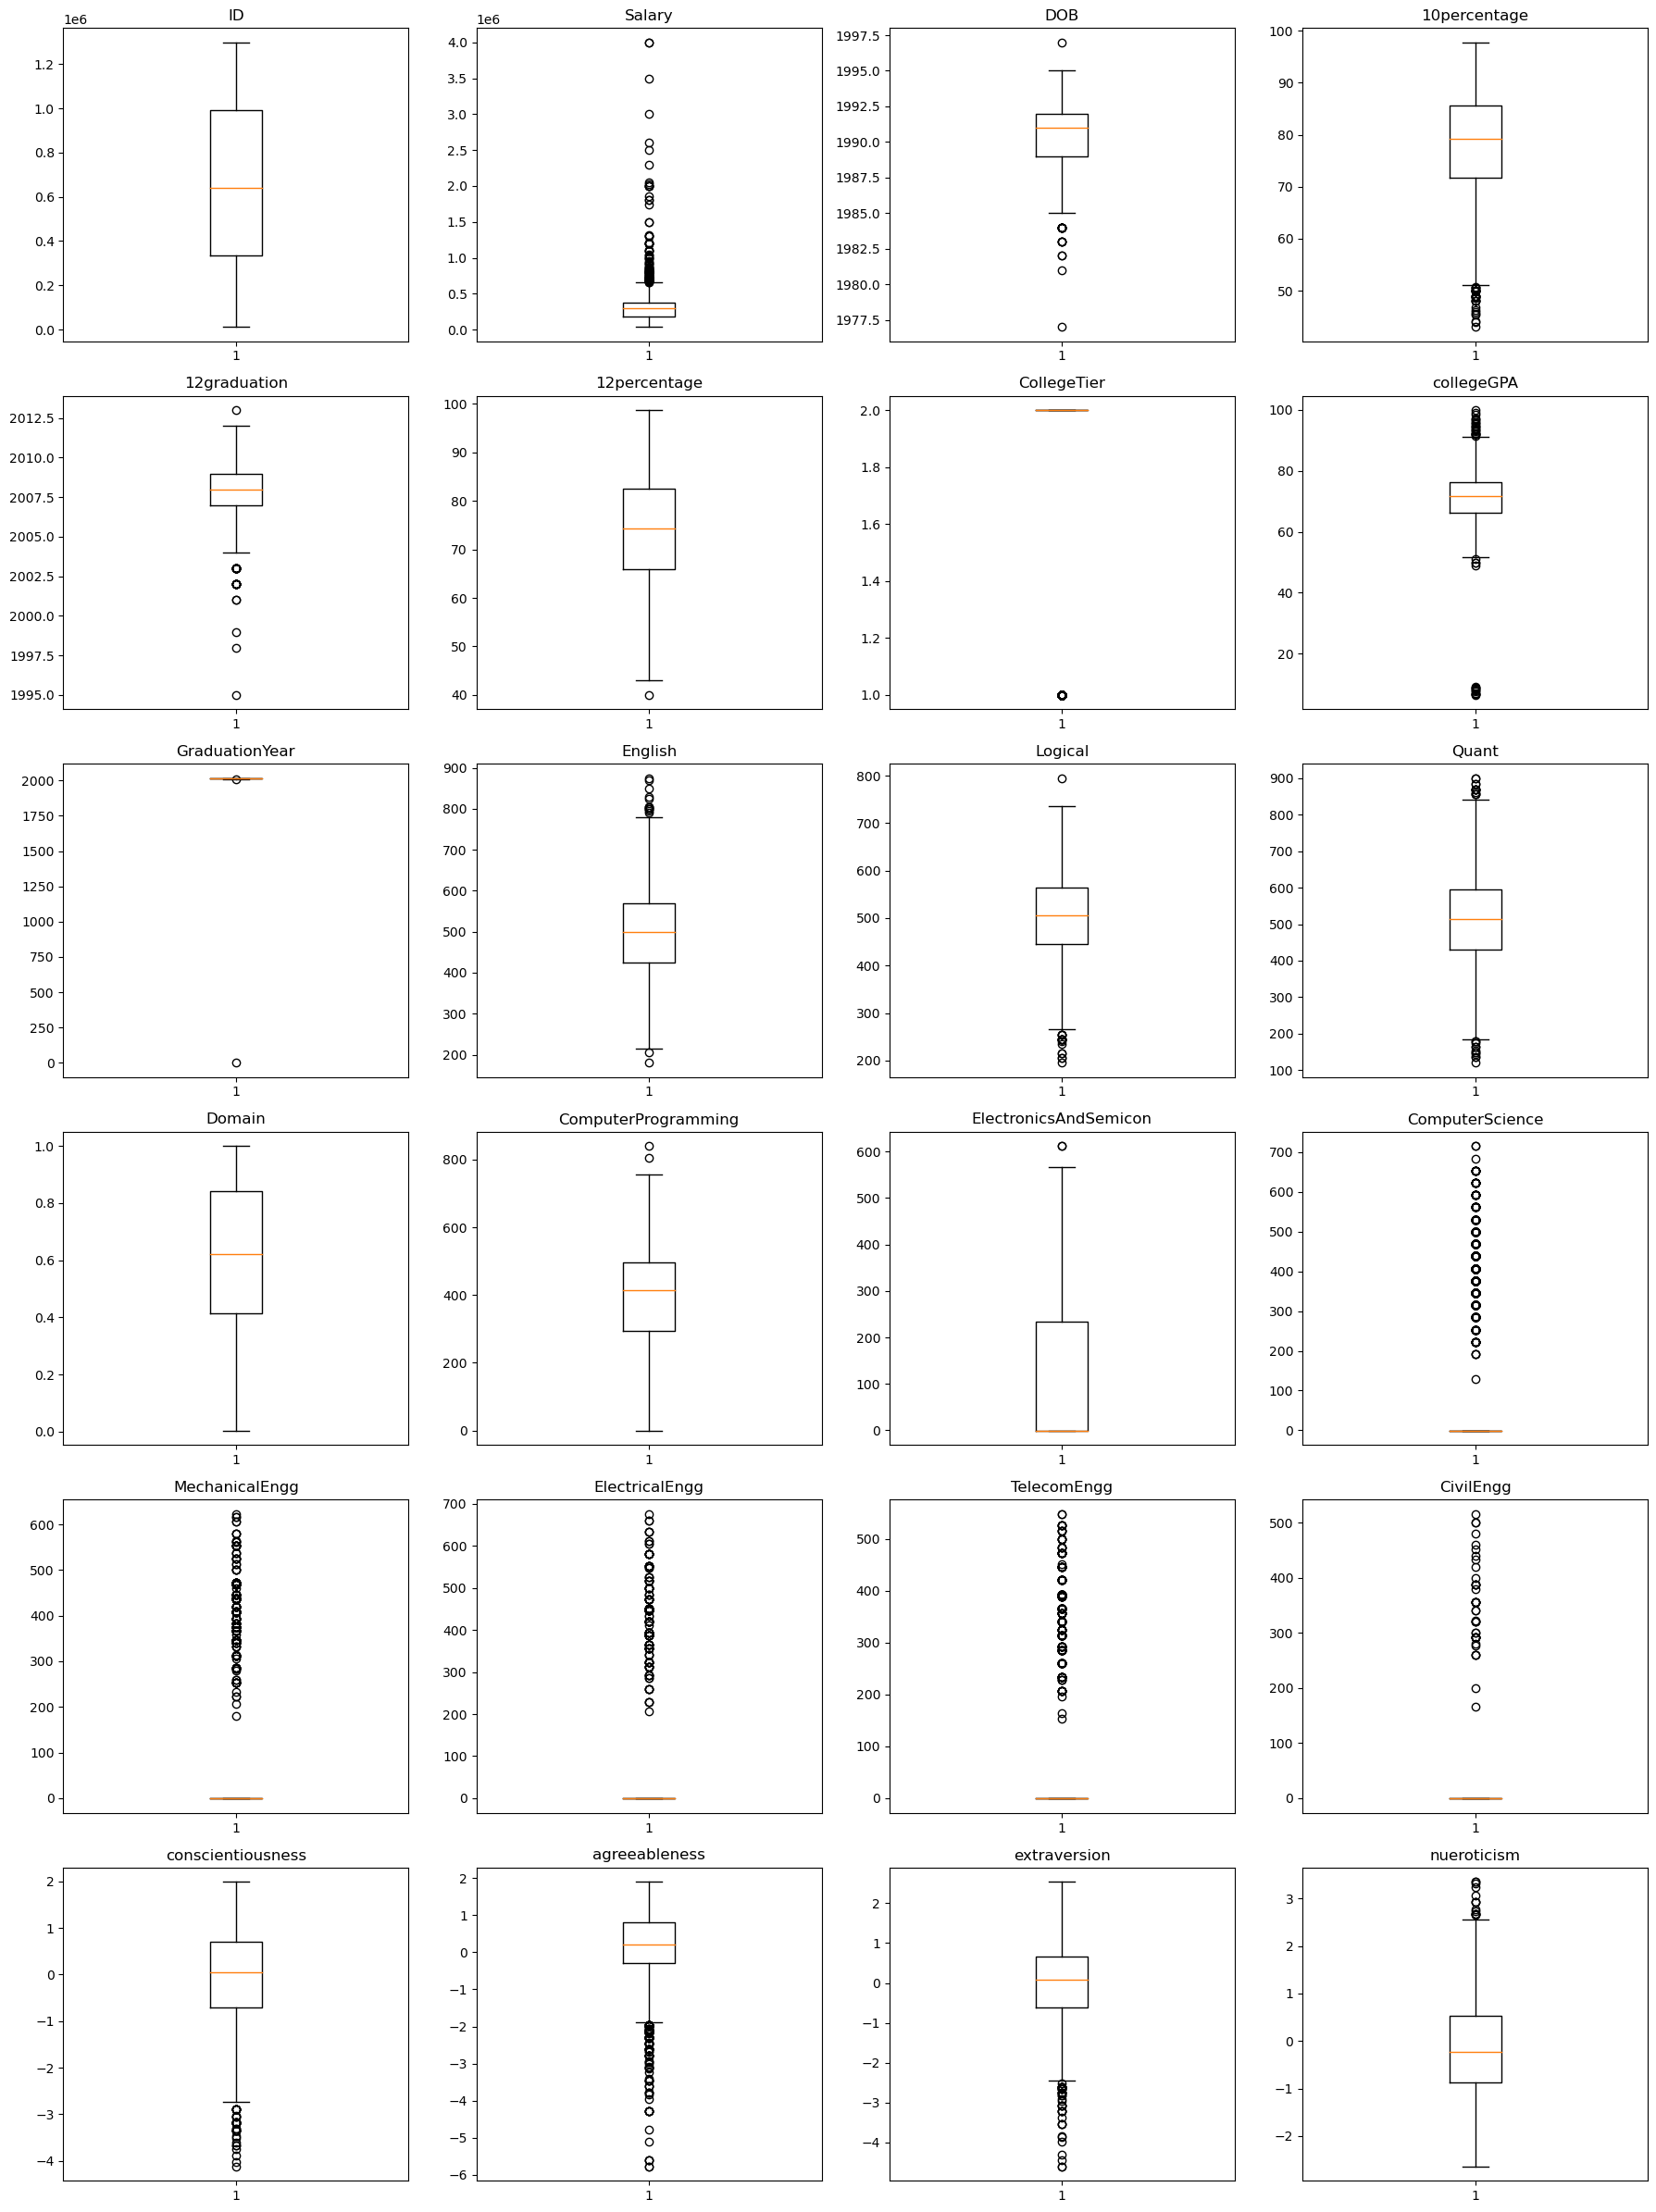

In [65]:
fig, axes = plt.subplots(6, 4, figsize=(18, 24))
df_filled = df.fillna(-1)
axes = axes.flatten()

# Ensure number of plots doesn't exceed number of columns
num_plots = min(len(col), len(axes))

for i, column in enumerate(col[:num_plots]):
    axes[i].boxplot(df_filled[column])
    axes[i].set_title(column)

# Hide extra subplots
for ax in axes[num_plots:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

# Data Visualization

<Axes: xlabel='Specialization', ylabel='Salary'>

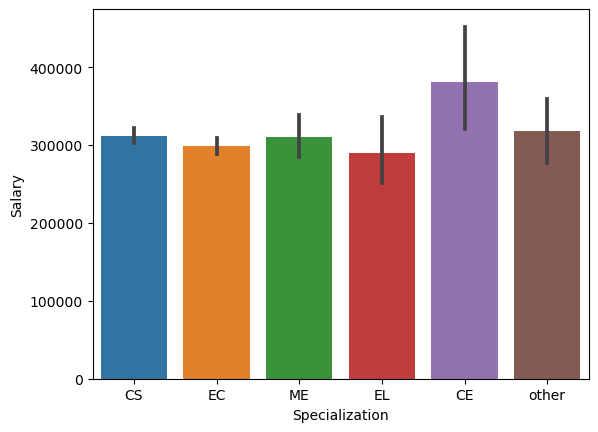

In [66]:
sns.barplot(data=df,x='Specialization',y='Salary')

- Aspirants from CE Branch earns the highest average pay
- All the other branches earn nearly similar average pay

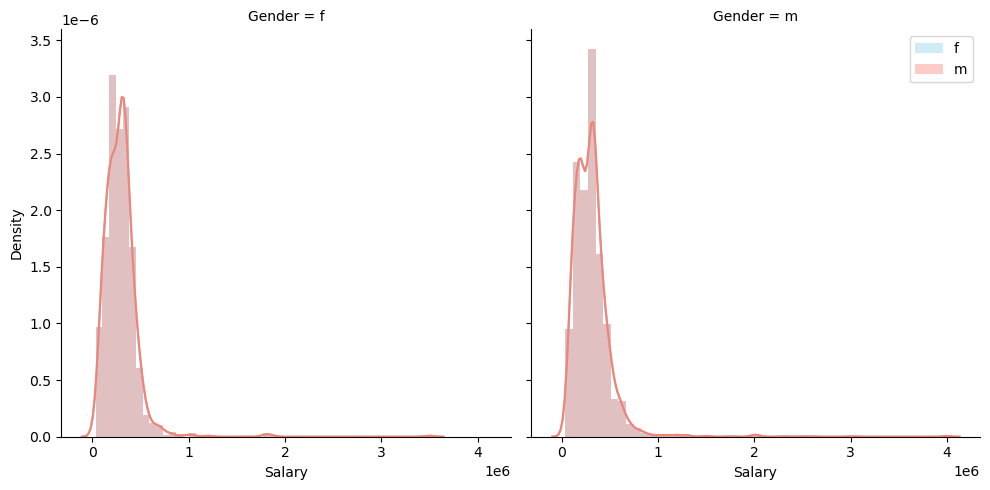

In [67]:

# Define custom colors
colors = ['skyblue', 'salmon']


g = sns.FacetGrid(df, col="Gender", height=5)

# Map the distplot for each Gender category with the corresponding color
for i, gender in enumerate(df['Gender'].unique()):
    g.map(sns.distplot, "Salary", bins=50, color=colors[i], label=gender)


plt.legend()

plt.show()


- We can observe that the salary data is right skewed.
- We can also see that the distributions are quite similar for male and female in the range below .

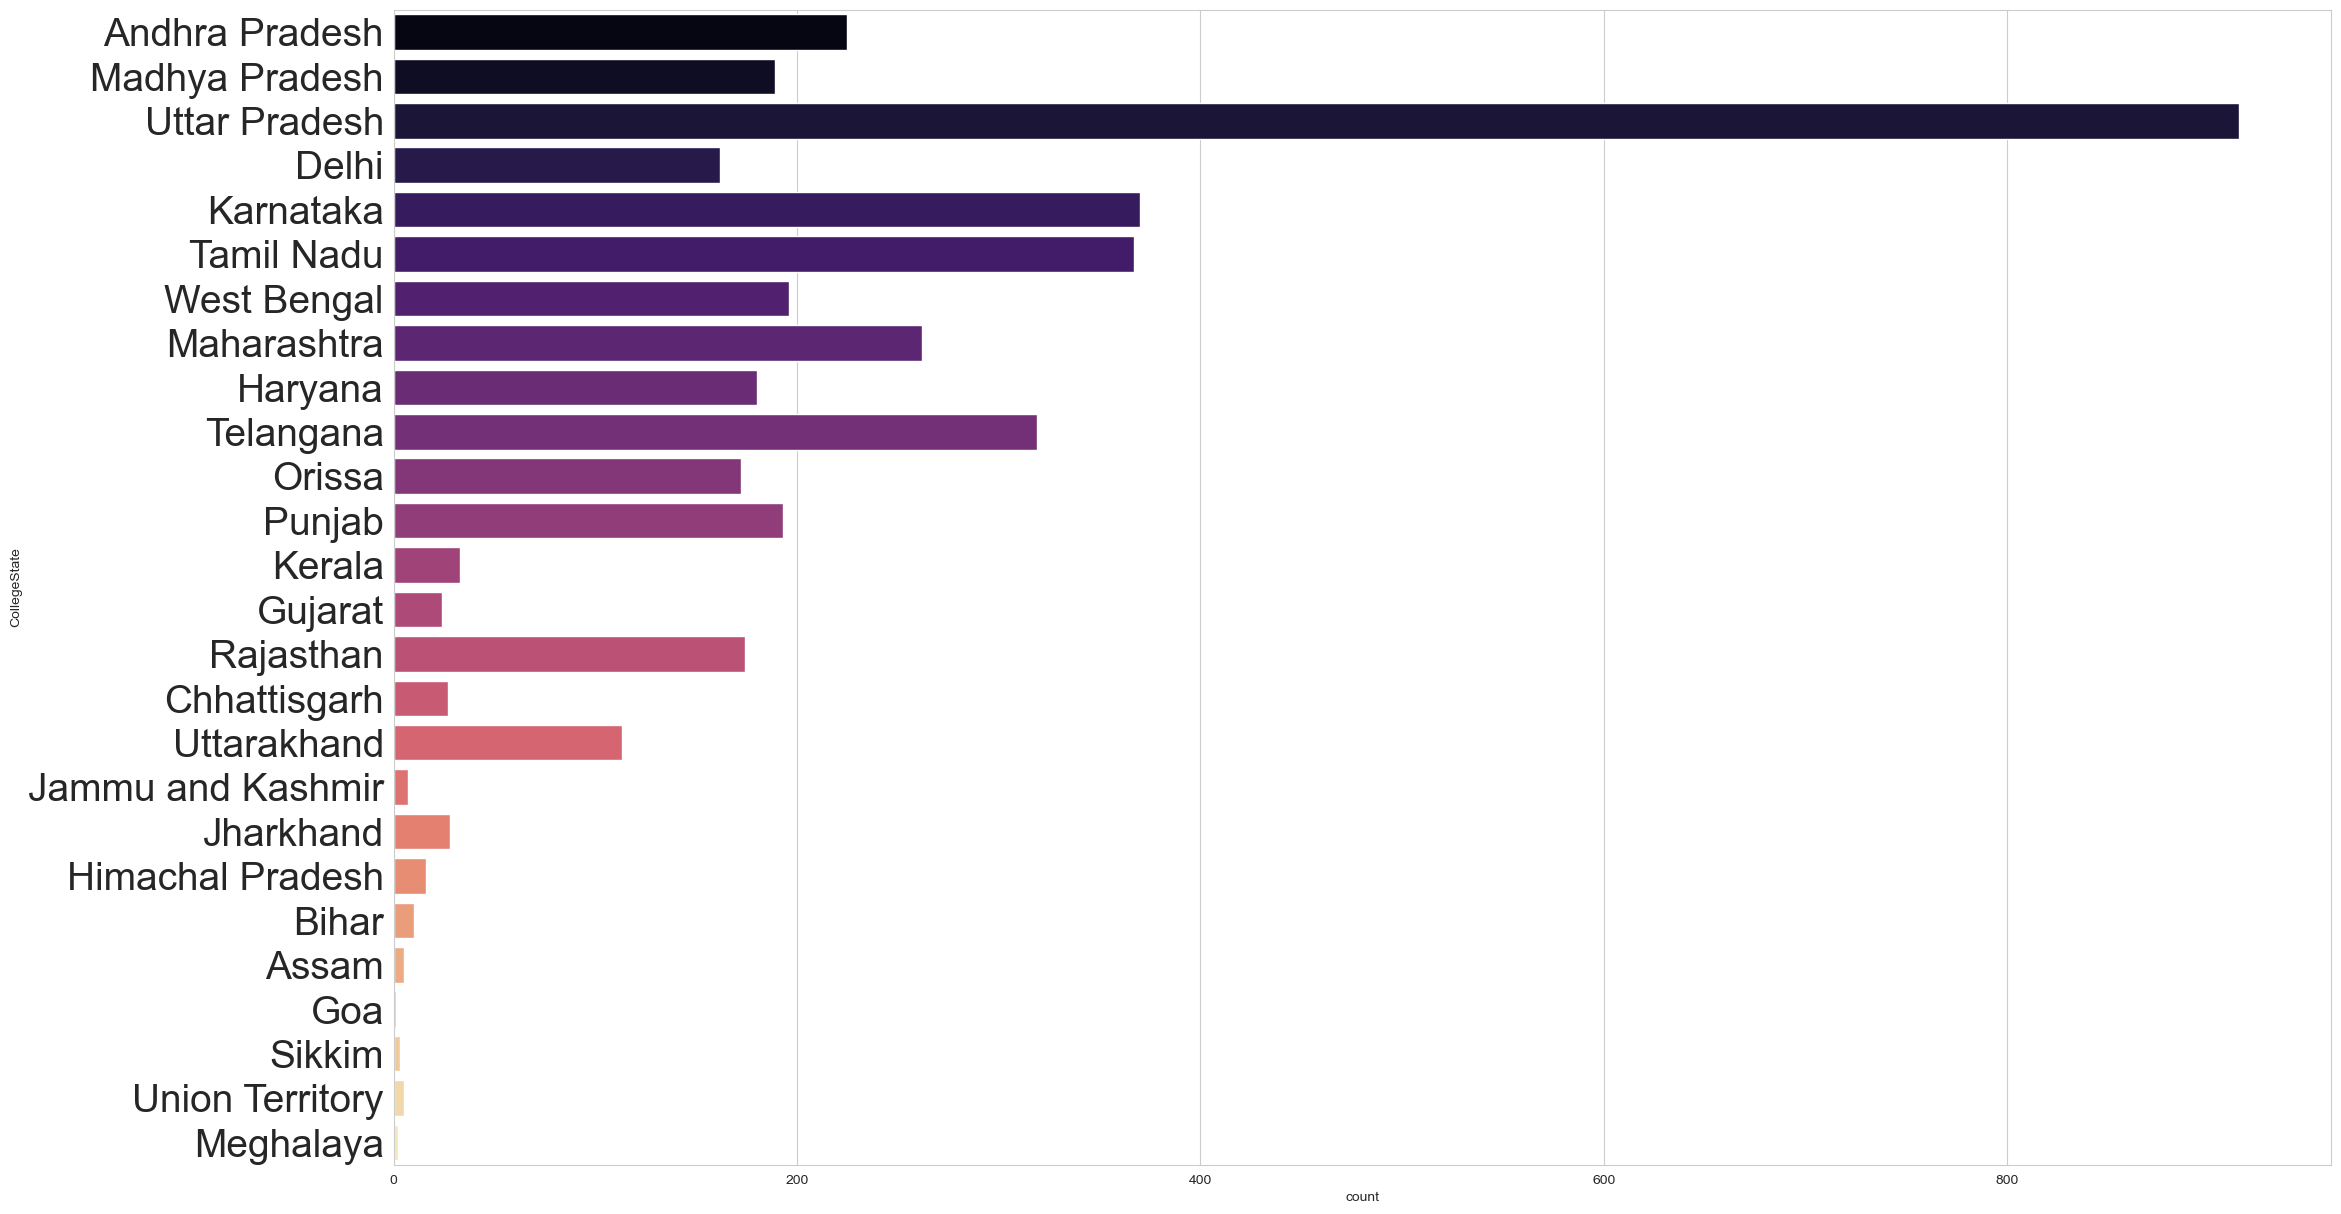

In [68]:
plt.figure(figsize=(25, 15))

# Set the plot style
sns.set_style("whitegrid")

# Use the custom color and plot
sns.countplot(data=df, y='CollegeState', palette='magma')

plt.yticks(fontsize=28)

plt.show()


- Most of the aspirants are from Uttar Pradesh, followed by Karnataka, TamilNadu and Telangana.

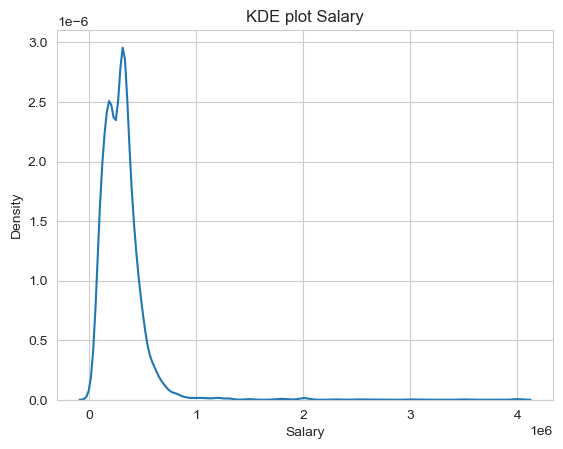

In [69]:
sns.kdeplot(x='Salary', data=df)
plt.title("KDE plot Salary")
plt.show()

- The X-axis represents salaries ranging from 0 to 4, while the Y-axis represents densities ranging from 0 to 3 approximately. 
- There is a sharp peak near zero on the Salary axis, indicating a significant number of individuals with low salaries.
- As we move away from the peak, there is a gradual decrease in density, implying that fewer people earn higher salaries.

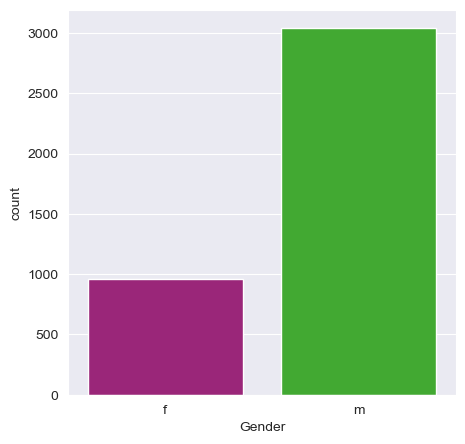

m    3041
f     957
Name: Gender, dtype: int64


In [70]:
plt.figure(figsize=(5, 5))


sns.set_style("darkgrid")


custom_palette = {'m': '#33bd1e', 'f': '#ad1382'}


sns.countplot(x='Gender', data=df, palette=custom_palette)

plt.show()

print(df['Gender'].value_counts())


- The ratio of m/f is 3.19 indicates there are 3 times more men than women employed

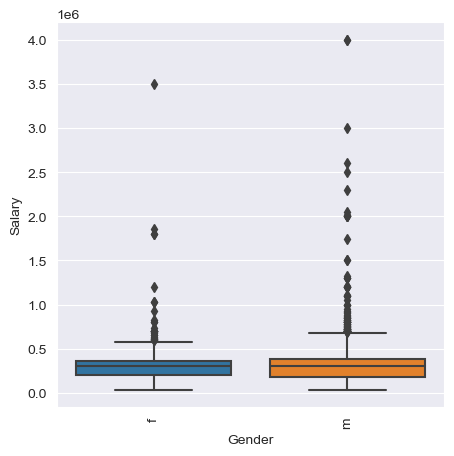

In [71]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Salary', x='Gender', data=df)
plt.xticks(rotation=90)
plt.show()


- It is noted that there are many outliers in the salary data
- There is not much difference between median salary for both genders.
- We can also observe male have more outliers indicating they are more people getting higher pays in male than female category

Text(0.5, 0.98, 'Salary levels by specialization')

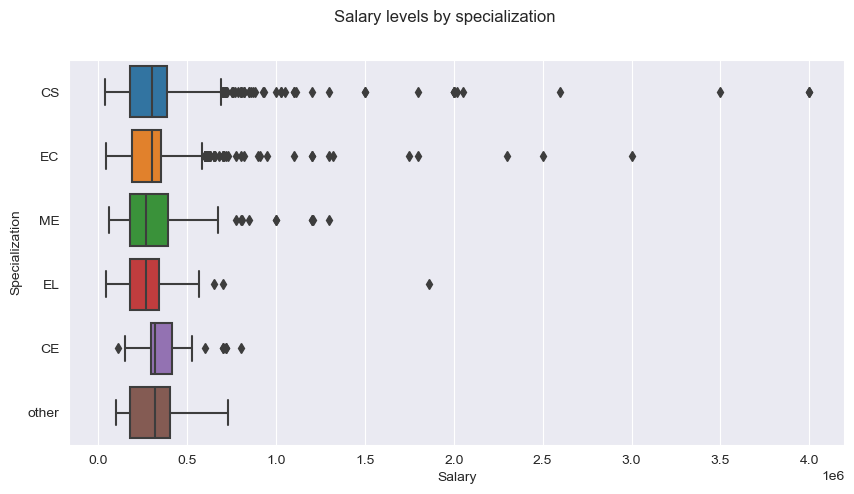

In [72]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Salary',y='Specialization',data=df)
plt.suptitle('Salary levels by specialization')

- The median salary for individuals across all specializations is nearly similar. 
- However, it's evident that individuals with specializations in CS/EC tend to receive higher salaries compared to others.

## Designation

In [73]:
 df['Designation'].value_counts()

software engineer                    539
software developer                   265
system engineer                      219
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 418, dtype: int64

In [74]:
popular_Designation = df['Designation'].value_counts()[:20].index.tolist()
print(popular_Designation)

['software engineer', 'software developer', 'system engineer', 'programmer analyst', 'systems engineer', 'java software engineer', 'software test engineer', 'project engineer', 'technical support engineer', 'senior software engineer', 'java developer', 'test engineer', 'web developer', 'application developer', 'assistant manager', 'network engineer', 'data analyst', 'business analyst', 'engineer', 'associate software engineer']


In [75]:
### Unique professions
top_Designations = df[df['Designation'].isin(popular_Designation)]
print(f"Unique professions : {len(df['Designation'].unique())}")
top_Designations.head()

Unique professions : 418


,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience
1,579905,500000.0,2013-09-01,2024-02-23,assistant manager,Indore,m,1989,85.40,CBSE,...,NaN,NaN,NaN,NaN,-0.7335,0.3789,1.2396,-0.10760,0.8637,11
2,810601,325000.0,2014-06-01,2024-02-23,systems engineer,Chennai,f,1992,85.00,CBSE,...,NaN,NaN,NaN,NaN,0.2718,1.7109,0.1637,-0.86820,0.6721,10
3,267447,1100000.0,2011-07-01,2024-02-23,senior software engineer,Gurgaon,m,1989,85.60,CBSE,...,NaN,NaN,NaN,NaN,0.0464,0.3448,-0.3440,-0.40780,-0.9194,13
4,343523,200000.0,2014-03-01,2015-03-01,system engineer,Manesar,m,1991,78.00,CBSE,...,NaN,NaN,NaN,NaN,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1
5,1027655,300000.0,2014-06-01,2024-02-23,system engineer,Hyderabad,m,1992,89.92,State,...,NaN,NaN,NaN,NaN,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,10


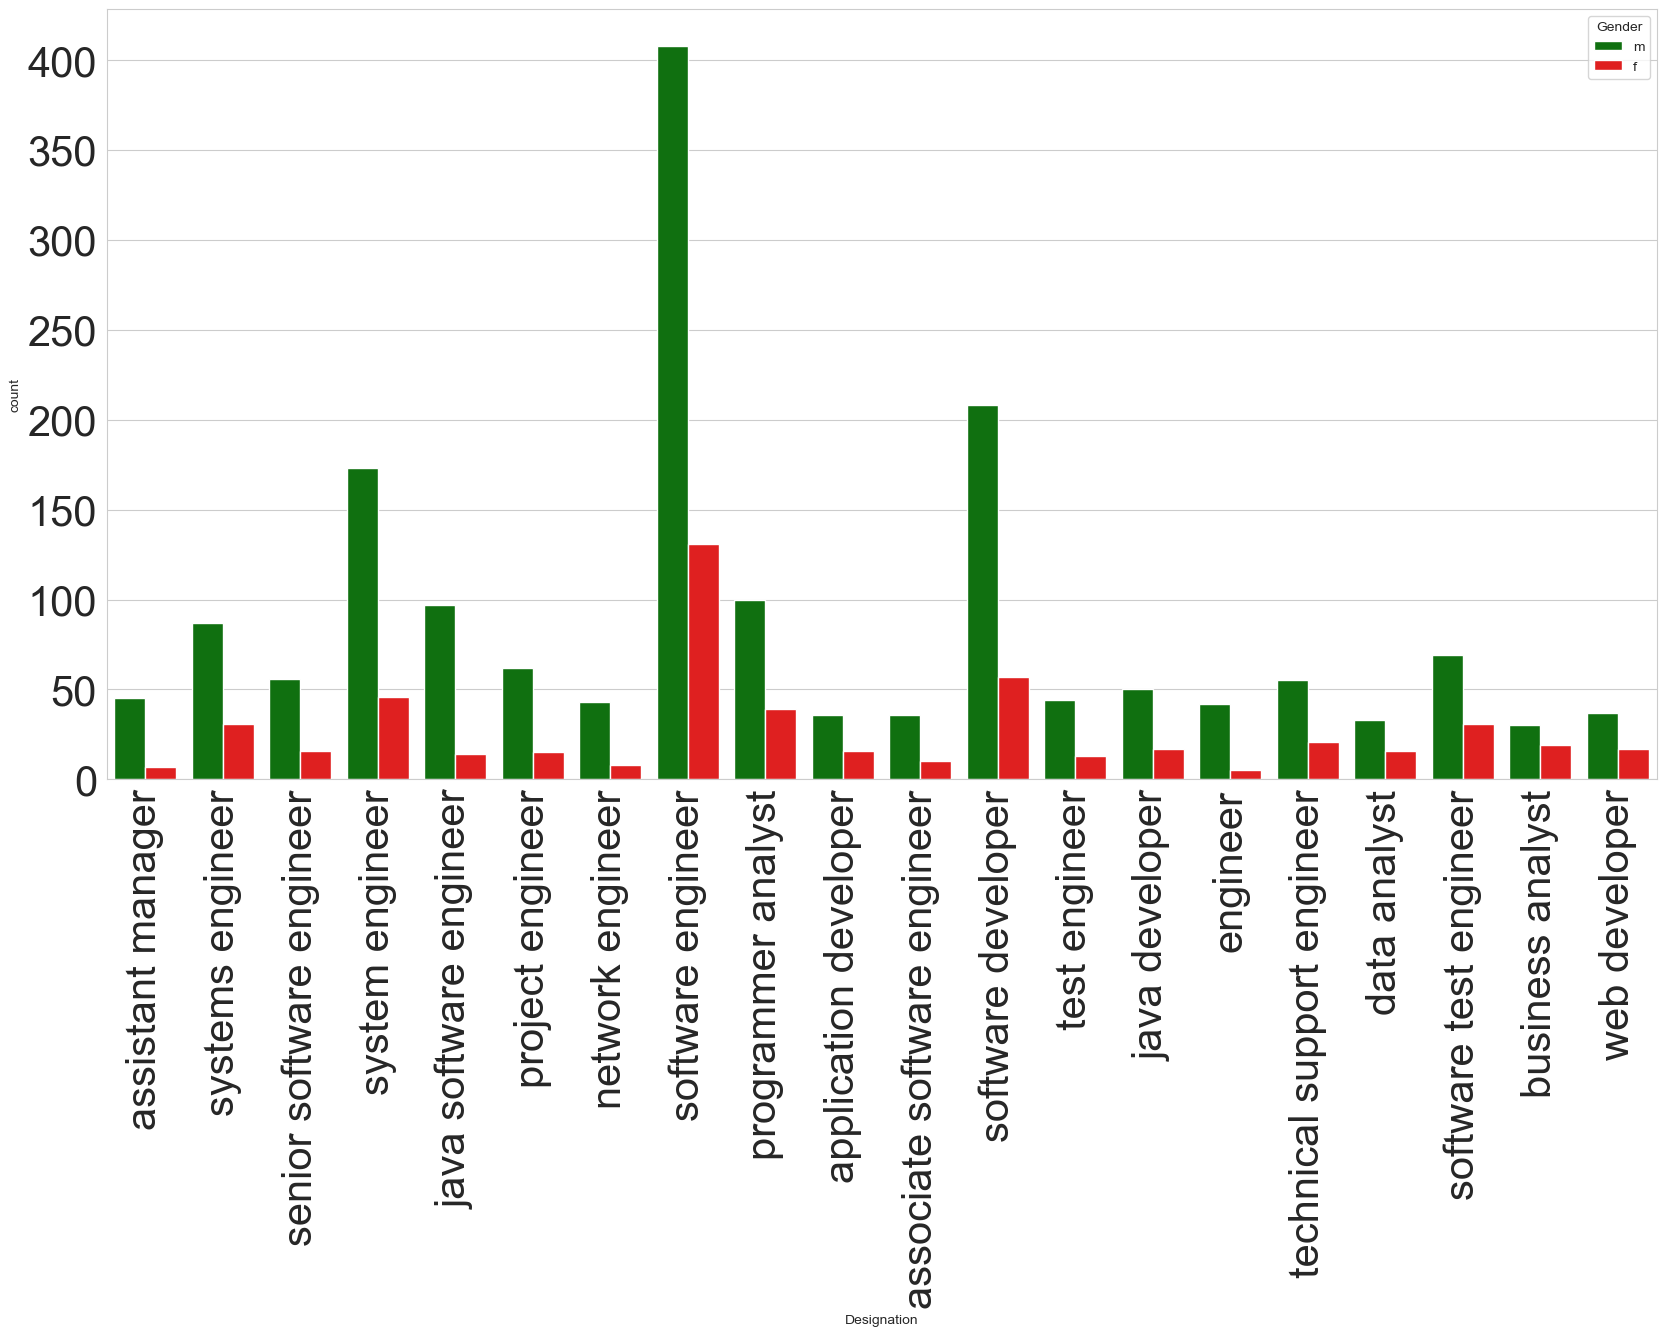

In [76]:
plt.figure(figsize=(20,10))

# Define custom colors
custom_palette = {'m': 'green', 'f': 'red'}

# Set the plot style
sns.set_style("whitegrid")

# Use the custom palette and plot
sns.countplot(x='Designation', hue='Gender', data=top_Designations, palette=custom_palette)

plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=30)

plt.show()


- Across all professions, males dominate, as evidenced by a significant disparity in frequency for each role. 
- The most common roles among Amcat aspirants, which predominantly fall within the domain of 'IT Roles.


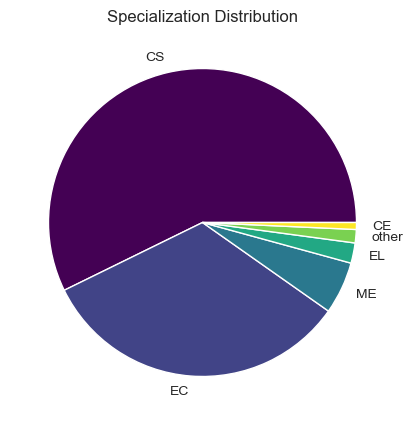

In [77]:
specialization_counts = df['Specialization'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(specialization_counts, labels=specialization_counts.index, colors=plt.cm.viridis(np.linspace(0, 1, len(specialization_counts))))
plt.title("Specialization Distribution")
plt.show()


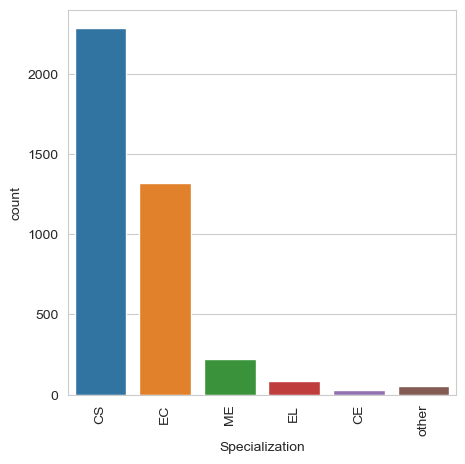

In [78]:
plt.figure(figsize=(5,5))
sns.countplot(x='Specialization', data=df)
#plt.title("Sales By Region")
plt.xticks(rotation=90)
#plt.text(5,6,"Hello")
plt.show()

- The majority of Amcat aspirants have specialized in Computer Science (CS) and Electronics and Communication (EC).

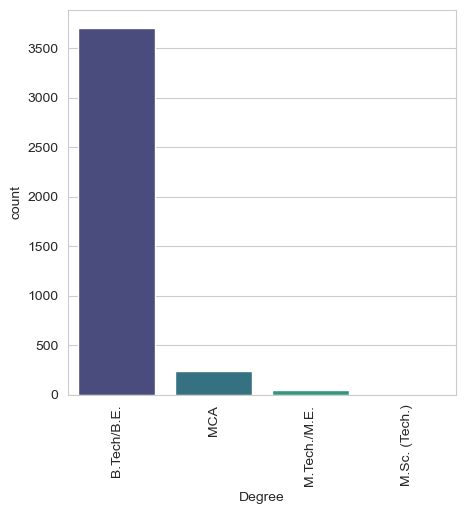

In [79]:
plt.figure(figsize=(5,5))
sns.countplot(x='Degree', data=df, palette='viridis')
#plt.title("Sales By Region")
plt.xticks(rotation=90)
#plt.text(5,6,"Hello")
plt.show()

- Most of the Amcat aspirants are from Btech domain.

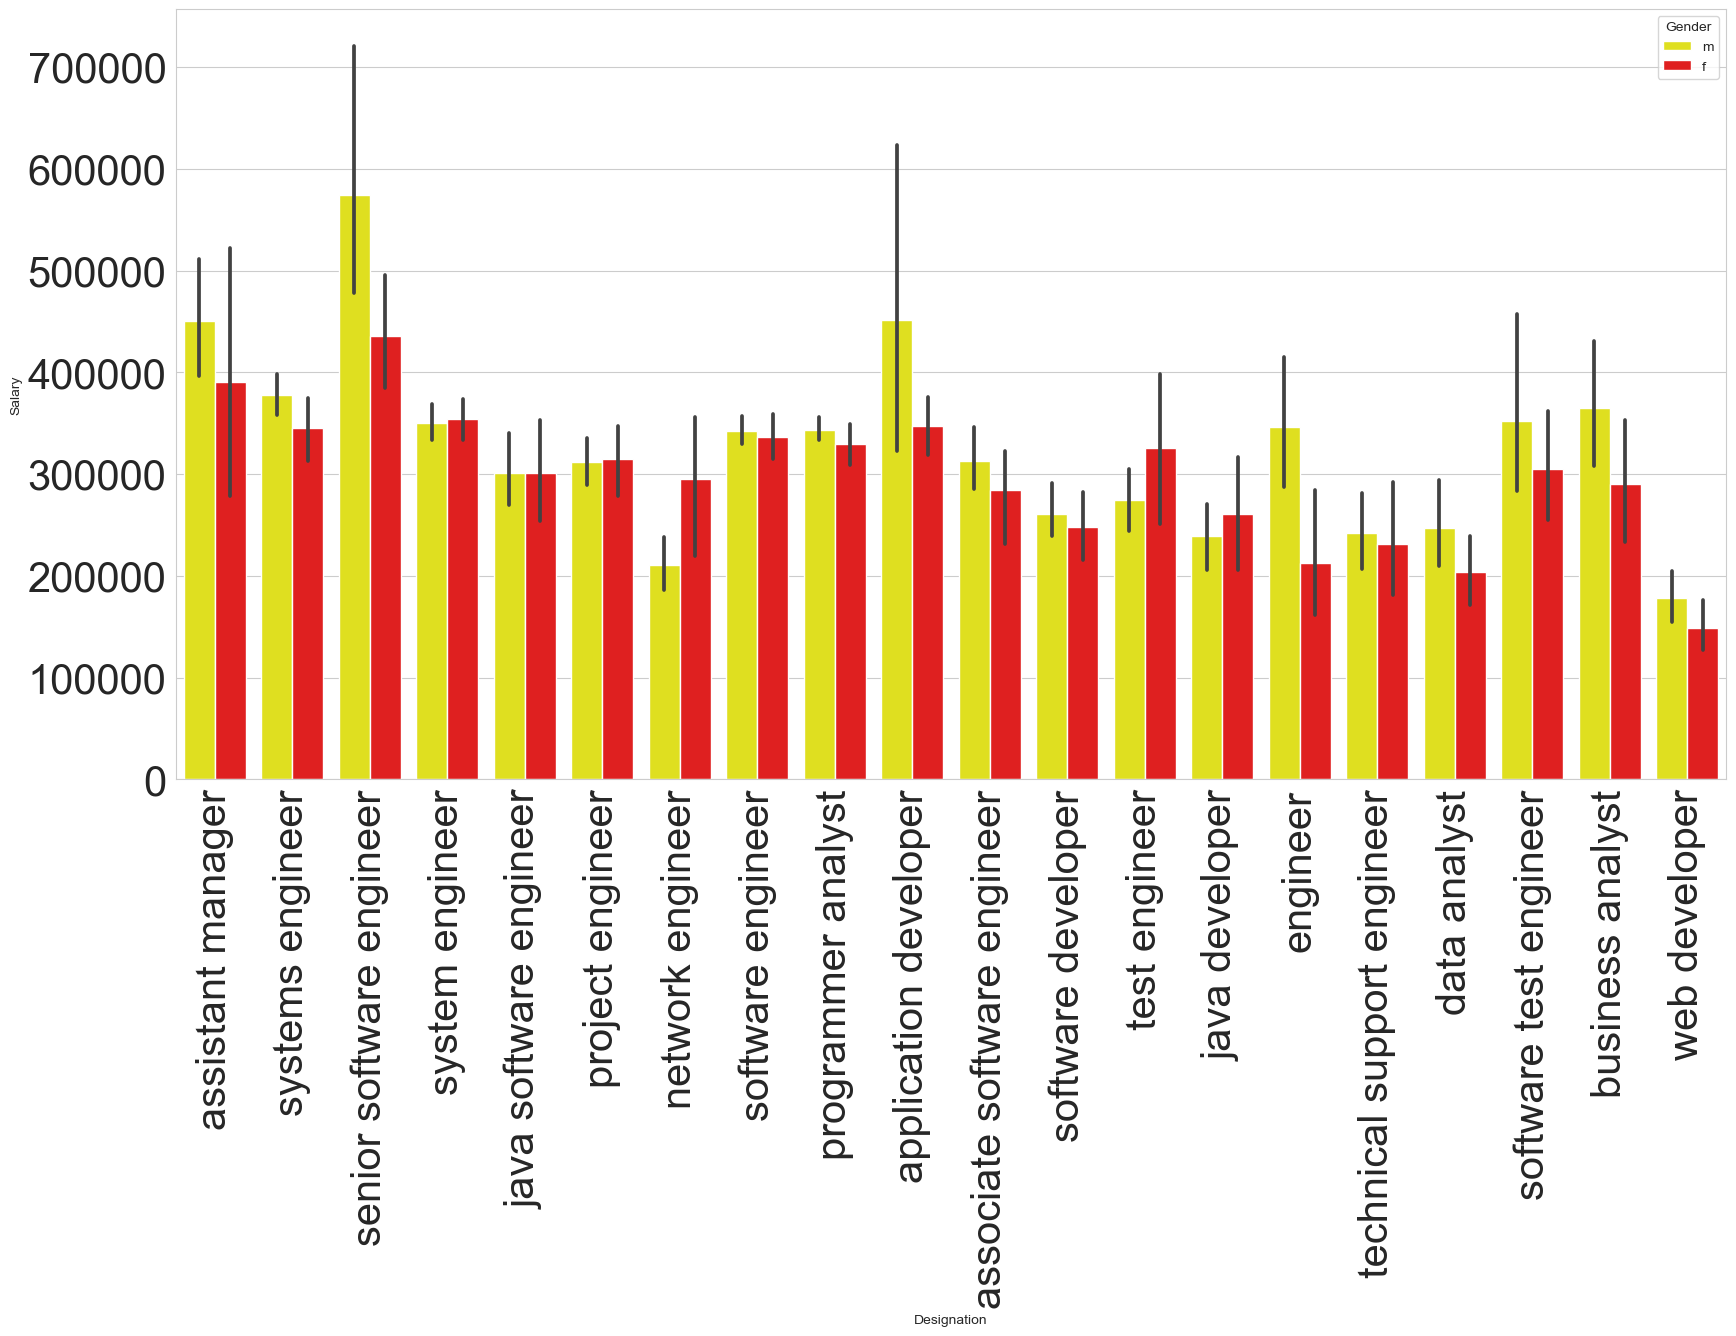

In [80]:
plt.figure(figsize=(20,10))
custom_palette = {'m': 'yellow', 'f': 'red'}
sns.barplot(x='Designation',y='Salary',hue='Gender',data=top_Designations, palette= custom_palette)
plt.xticks(fontsize=30,rotation=90)
plt.yticks(fontsize=30)
plt.show()

- mean salary of top most frequent roles is nearly independent of gender.
- there is some considerable difference in some roles.but we cannot be sure that women is being paid less in that role
- it might be due to experience,specialization etc.

In [81]:
### High paying designations and their relation with respect to gender
high = list(df.sort_values("Salary",ascending=False)["Designation"].unique())[:20]
high_pay = df[df['Designation'].isin(high)]
high_pay.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience
3,267447,1100000.0,2011-07-01,2024-02-23,senior software engineer,Gurgaon,m,1989,85.60,CBSE,...,NaN,NaN,NaN,NaN,0.0464,0.3448,-0.3440,-0.4078,-0.9194,13
6,947847,300000.0,2014-08-01,2015-05-01,java software engineer,Bangalore,m,1993,86.08,State,...,NaN,NaN,NaN,NaN,1.7081,-0.1054,-1.0379,-2.0092,-1.0872,1
14,1279958,300000.0,2013-07-01,2024-02-23,java software engineer,Bangalore,m,1992,81.20,State,...,NaN,NaN,NaN,NaN,0.7027,0.7119,0.0100,-0.9950,0.6721,11
19,466888,325000.0,2014-09-01,2024-02-23,software engineer,Pune,f,1990,79.00,CBSE,...,NaN,NaN,NaN,NaN,0.8192,0.2668,-0.2714,-0.4078,-0.1295,10
20,140069,320000.0,2010-11-01,2012-09-01,software engineer,Bangalore,f,1988,91.20,State,...,NaN,NaN,NaN,NaN,-0.1082,0.9688,0.5269,-0.2902,0.3444,2


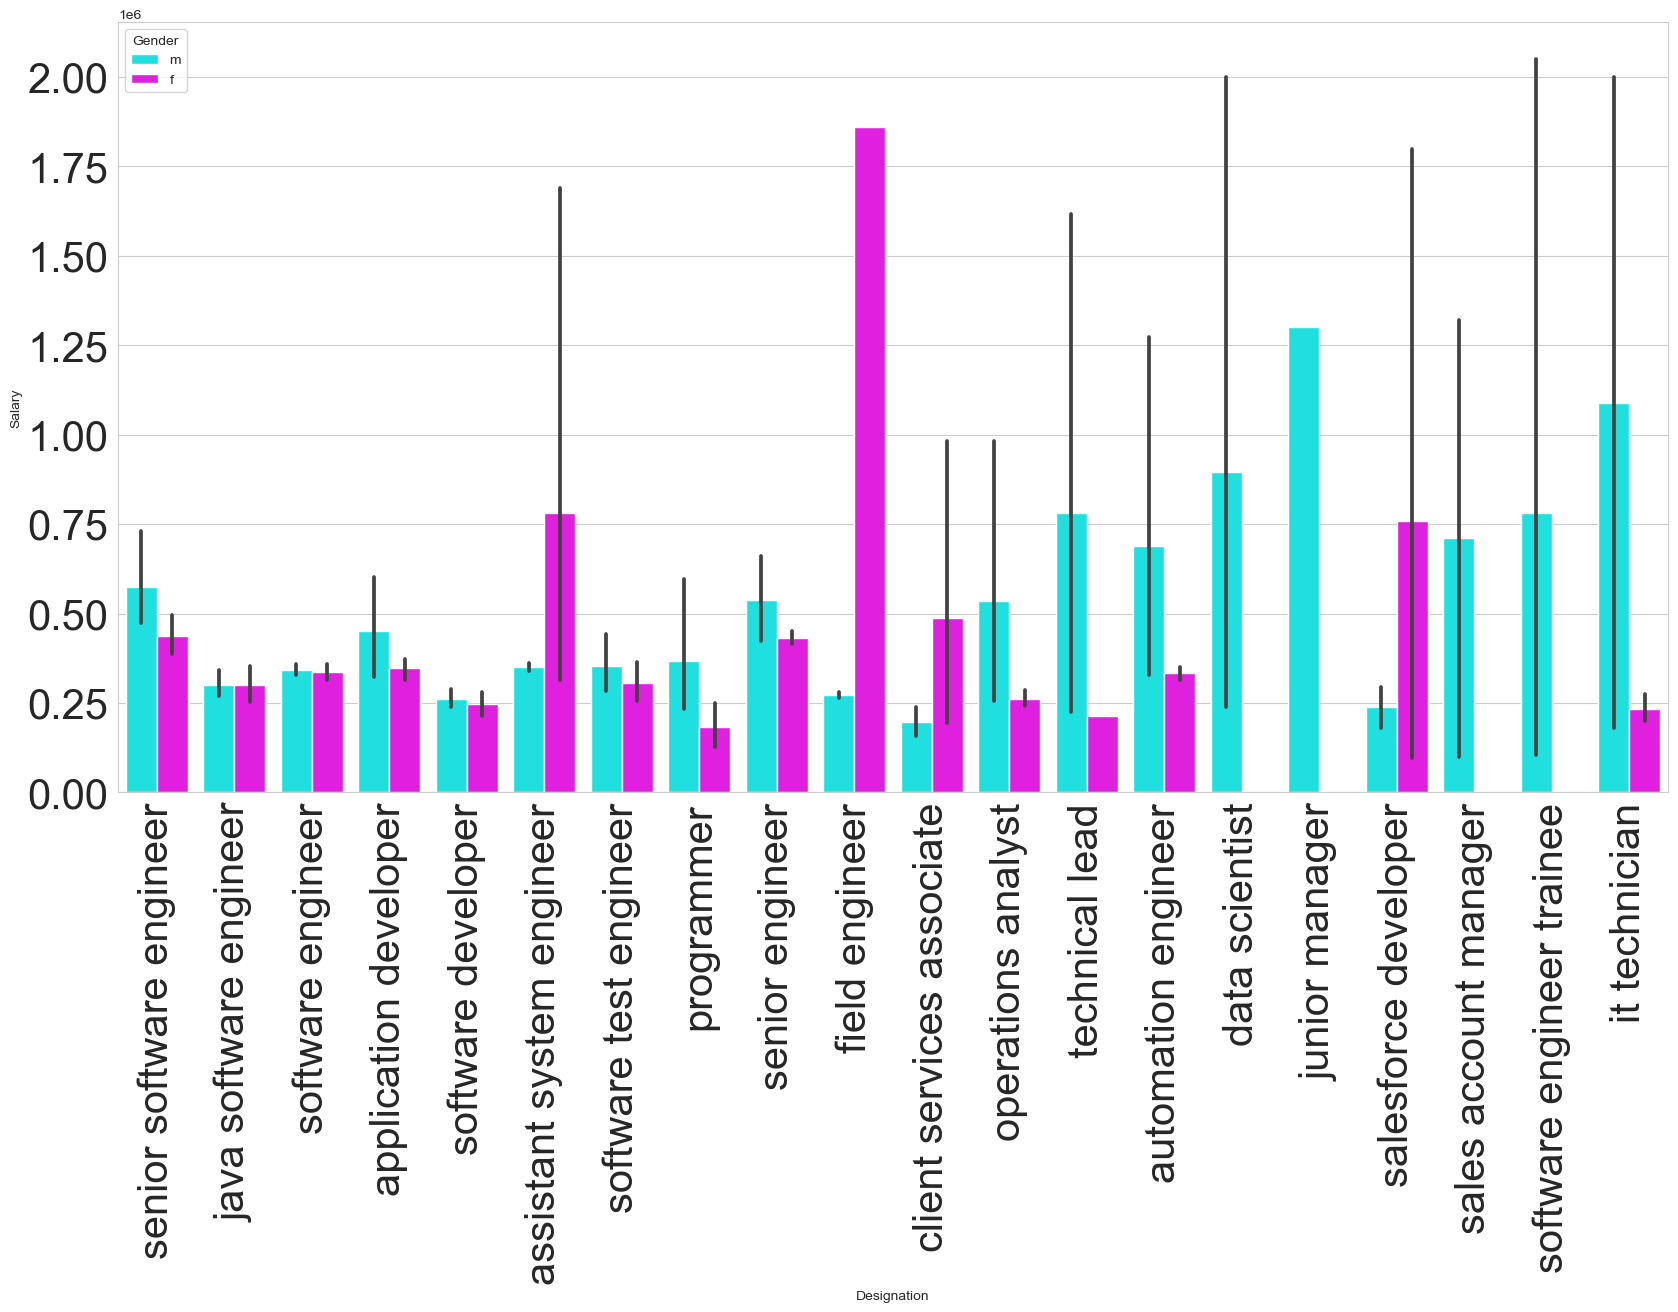

In [82]:
plt.figure(figsize=(20,10))
custom_palette = {'m': 'cyan', 'f': 'magenta'}
sns.barplot(x='Designation',y='Salary',hue='Gender',data=high_pay, palette = custom_palette  )
plt.xticks(fontsize=30,rotation=90)
plt.yticks(fontsize=30)
plt.show()

- Most of the high paying jobs are from IT domain.
- In 45% of top paying roles,men are generally paid higher compared to women.
- In 20% of top paying roles,women are paid higher than men
- In roles like junior manager,sales account manager,software engineer trainee there are no women working in these fields.
- Junior manager is highest paying for men and field engineer is the highest paying role for women.
- The disperancy between pay based on gender might be because of other features like experience,specialization etc.
- Software Enginner and Software developer are most frequent and highest paying jobs

Average experience (females): 5.81 years
Average experience (males): 5.74 years


<Figure size 3000x1000 with 0 Axes>

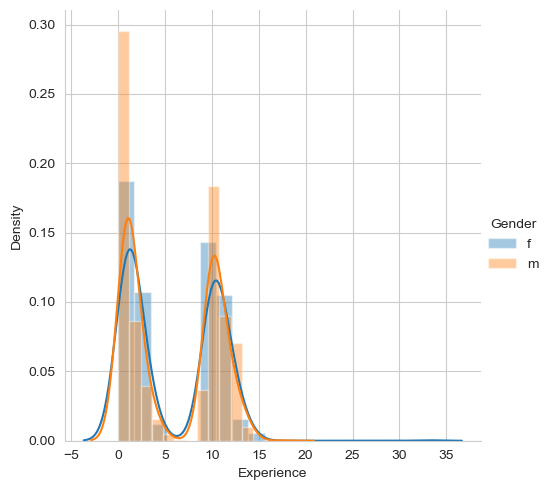

In [83]:
# Calculate average experience for each gender
mean_experience_f = df[df['Gender'] == 'f']['Experience'].mean()
mean_experience_m = df[df['Gender'] == 'm']['Experience'].mean()

# Plotting
plt.figure(figsize=(30,10))

sns.FacetGrid(df, hue="Gender", height=5) \
   .map(sns.distplot, "Experience") \
   .add_legend()

# Print average experience for each gender
print(f"Average experience (females): {mean_experience_f:.2f} years")
print(f"Average experience (males): {mean_experience_m:.2f} years")

plt.show()

- It is a Bi-Modal Distribution
- Average Experience of male is around 5.74 years and for women it is around 5.81 years.

<Axes: >

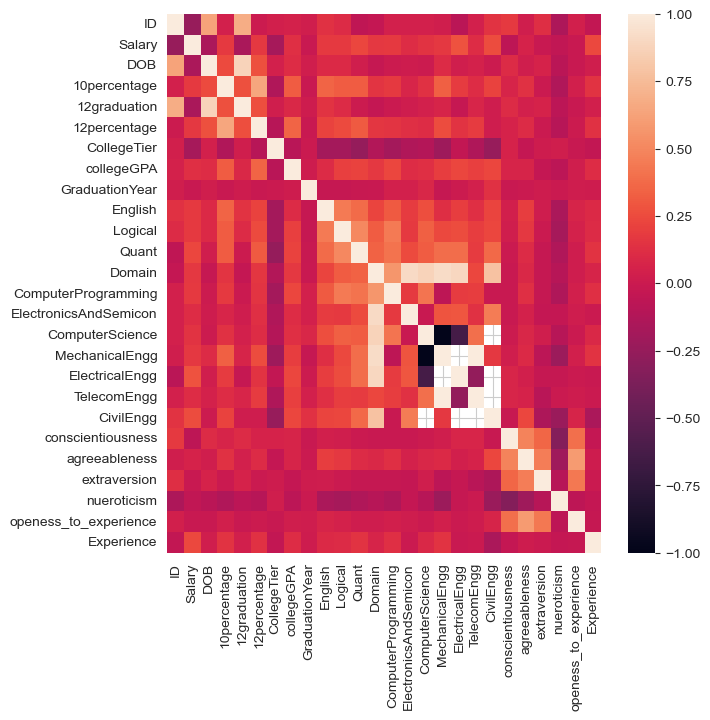

In [84]:
plt.figure(figsize= (7,7), dpi=100)
sns.heatmap(df[col].corr())

- positive Correlations:
- Higher college GPA tends to correlate positively with conscientiousness.
- Stronger computer programming skills correlate with higher domain knowledge.
- Negative Correlations:
- Neuroticism negatively correlates with  conscientiousness.
- Experience may have a negative correlation with age at graduation.


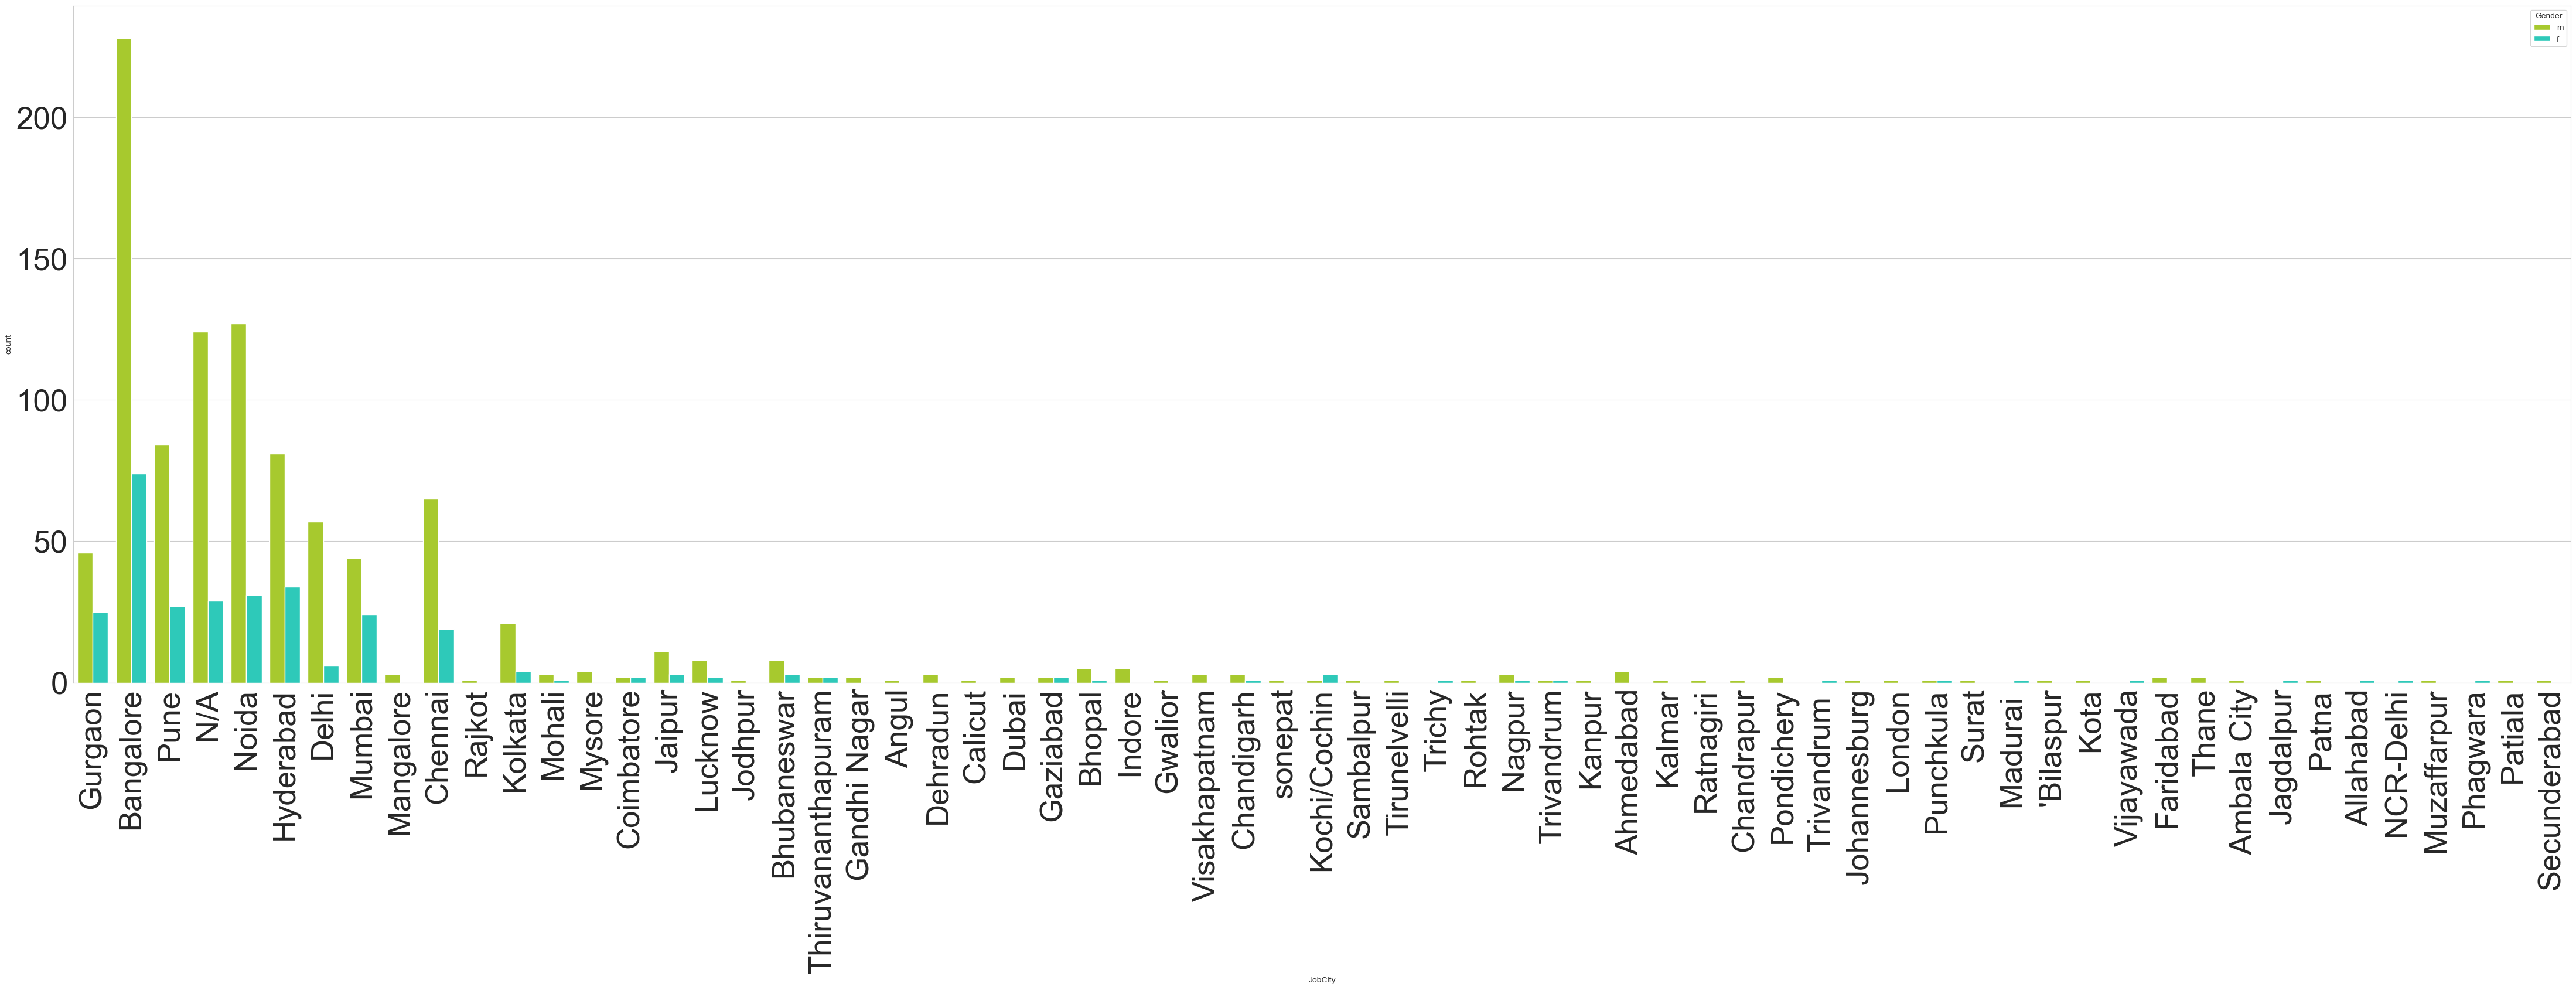

In [85]:

plt.figure(figsize=(55,15))

# Define custom palette
custom_palette = {'m': '#b6e314', 'f': '#14e3ce'}

# Use custom palette and pattern
sns.countplot(x="JobCity", data=high_pay, hue="Gender", palette=custom_palette)
plt.xticks(fontsize=38, rotation=90)
plt.yticks(fontsize=38)
plt.show()


- Most amcat aspirants work in bengalore,Noida,Hyderabad and pune.
- It is because most of them are from IT domain so majority of them work in these cities

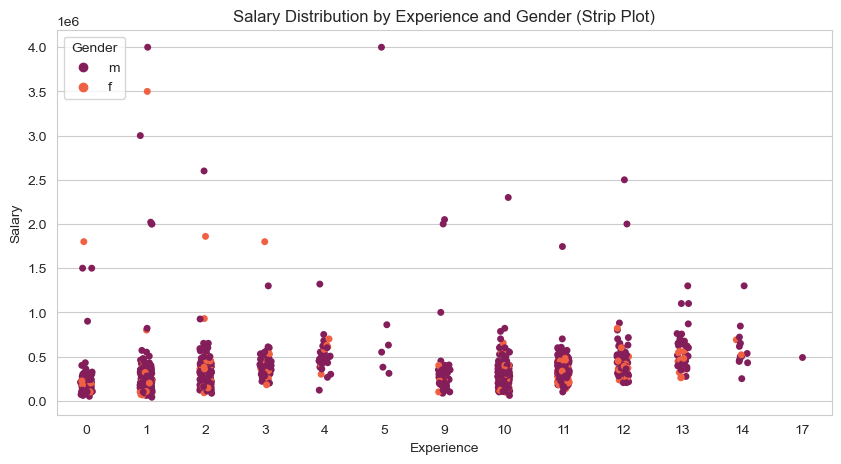

In [86]:
plt.figure(figsize=(10, 5))
sns.stripplot(data=high_pay, x='Experience', y='Salary', hue='Gender', jitter=True, palette='rocket')
plt.legend(title='Gender', loc='upper left')
plt.title('Salary Distribution by Experience and Gender (Strip Plot)')
#plt.xticks(rotation=45)
plt.show()


- Median salary of both males and females have increased slightly with exp for first five years
and Decreased suddenly on the 6th year and then same pattern for the following years.
- We can see that men and women having same experience are paid nearly equally around 3.5-5 lakhs
- we need to further see the distribution of experience with respect to Designation for both men and women
to check whether women are being paid less in a role due to experience.

<Figure size 500x500 with 0 Axes>

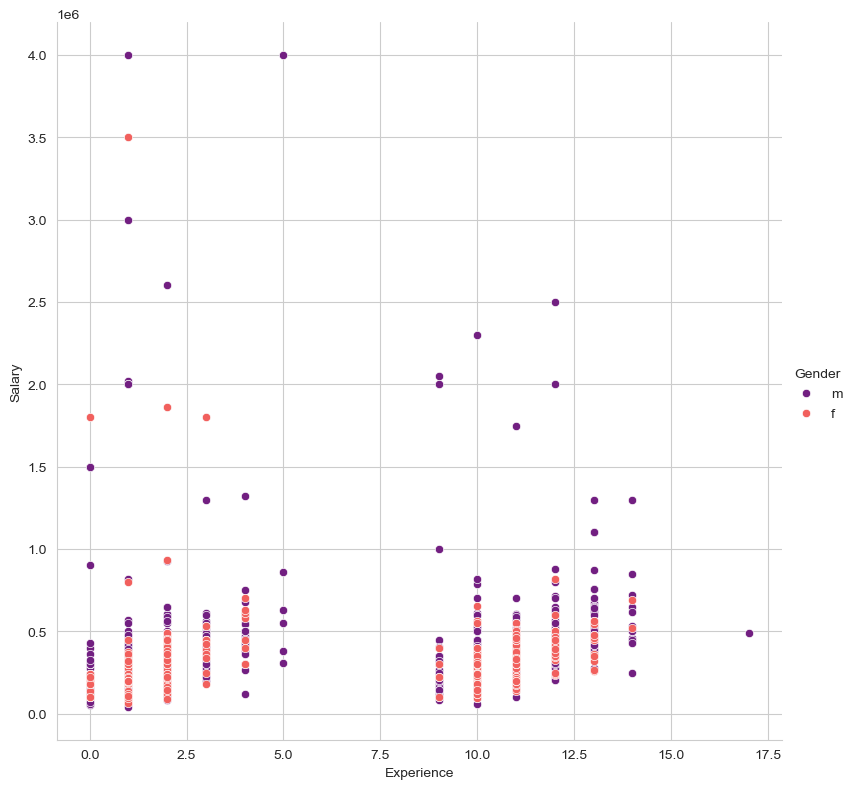

In [87]:
plt.figure(figsize=(5,5))
g = sns.FacetGrid(data=high_pay, hue='Gender', height=8, palette='magma') \
    .map(sns.scatterplot, 'Experience', 'Salary') \
    .add_legend()
plt.show()


- For same amount of experience,men are paid slightly higher than women in most of the cases.
- Mostly men have highly paid jobs compared with women for every level of experience.

<Figure size 1500x500 with 0 Axes>

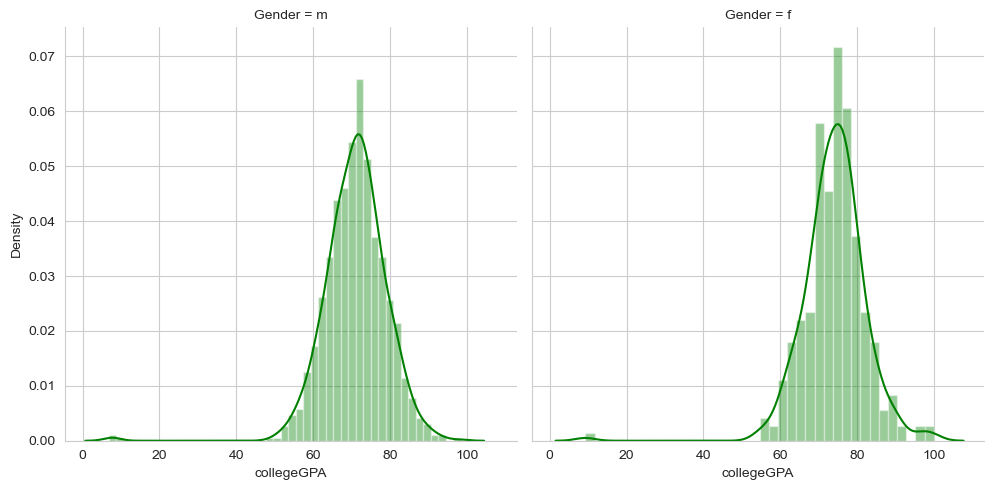

In [88]:
### Now let us check relation with collegegpa
### first check the distribution of gpa 
plt.figure(figsize=(15,5))

# Create FacetGrid and map the distplot with green color
sns.FacetGrid(data=high_pay, col='Gender', height=5) \
   .map(sns.distplot, 'collegeGPA', color='green') \
   .add_legend()

plt.show()

- We can see both distribution of college gpa vs male&female are normally distributed with mean around 75%.
- We can see how Similar both male and female distributions are for collegeGPA
- IQR is narrow indication most number of students have similar cgpa in 70-75% region.
- There are some students with CGPA < 20 and CGPA>90

<Figure size 500x500 with 0 Axes>

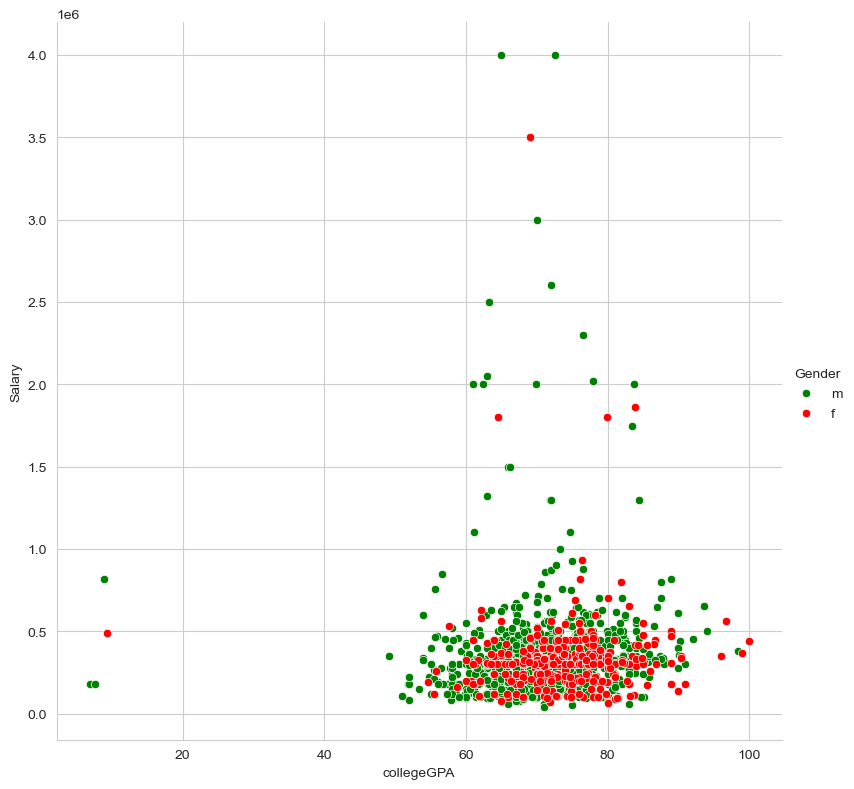

In [89]:
plt.figure(figsize=(5, 5))

# Define custom palette
custom_palette = {'m': 'green', 'f': 'red'}

# Create FacetGrid and map the scatterplot with custom palette
sns.FacetGrid(data=high_pay, hue='Gender', height=8, palette=custom_palette) \
   .map(sns.scatterplot, 'collegeGPA', 'Salary') \
   .add_legend()

plt.show()

- Most of men and women have cgpa around 70-75 which is a good range.
- There is no relation that having high or low gpa being men/women is effecting the salary
- so we can conclude this is not the reason for women being paid less as both distributions overlap extensively.

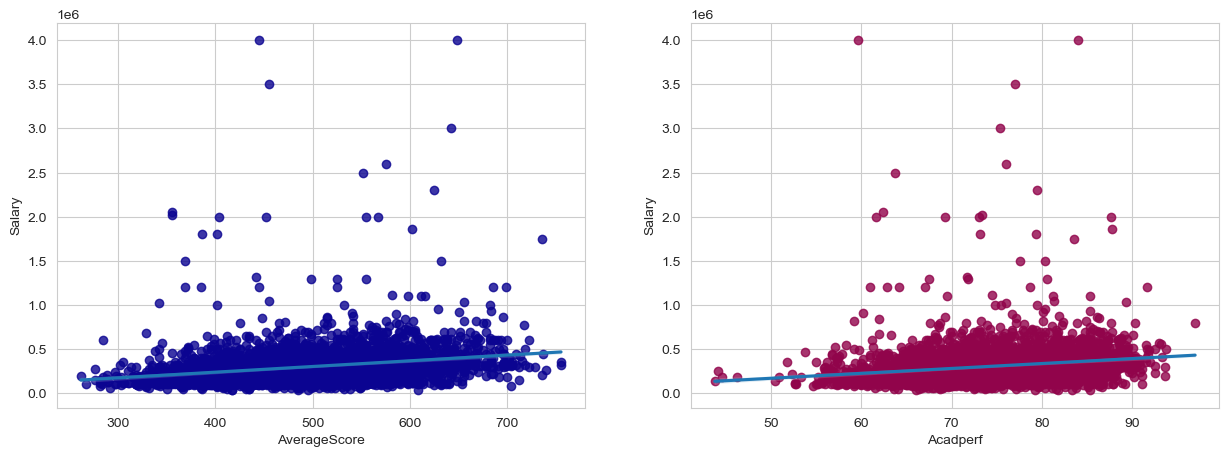

In [90]:

plt.figure(figsize=(15, 5))

# Calculate Average Score and Academic Performance
df['AverageScore'] = (df['Logical'] + df['Quant'] + df['English']) / 3
df['Acadperf'] = (df['10percentage'] + df['12percentage'] + df['collegeGPA']) / 3

# Plotting the regression plots with color
plt.subplot(1, 2, 1)
sns.regplot(x='AverageScore', y='Salary', data=df, scatter_kws={"color": "#0b0491"})
plt.subplot(1, 2, 2)
sns.regplot(x='Acadperf', y='Salary', data=df, scatter_kws={"color": "#91044b"})
plt.show()

- We can see there is some positive correlation of salary with both the Avgscore and Acadperformance.

<Axes: xlabel='Specialization', ylabel='Salary'>

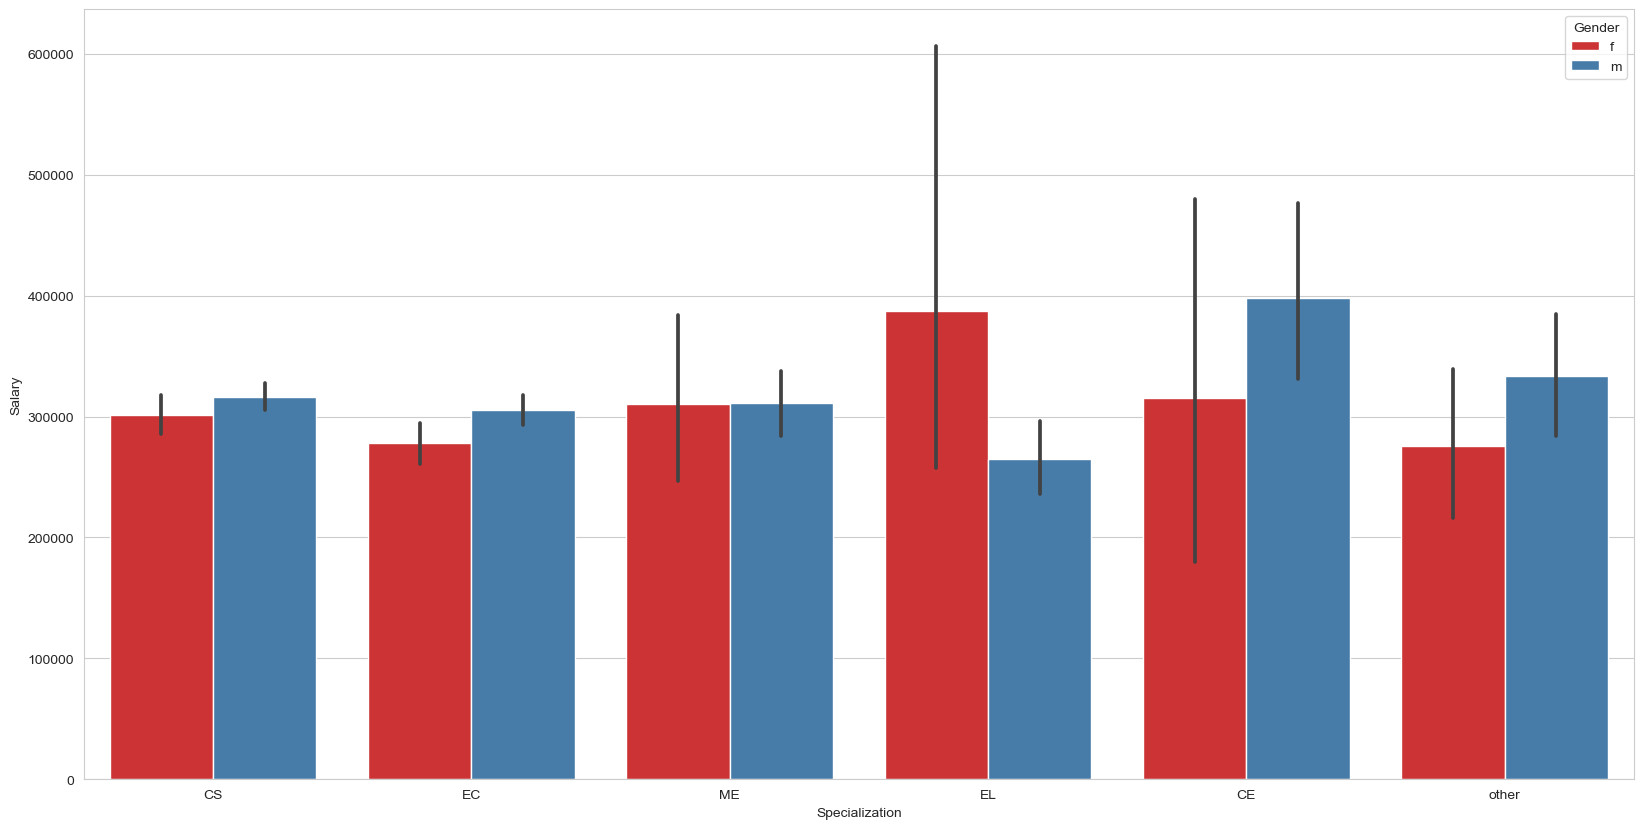

In [91]:
# For the total Dataset
## Checking whether specialization has any effect on salary
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='Specialization',y='Salary',hue='Gender',palette='Set1')

- Men from CS,EC,CE Earn slightly greater than women from this specialization.
- Women from the EL specialization Earns way more than men from same specialization.

<Axes: xlabel='Specialization', ylabel='Salary'>

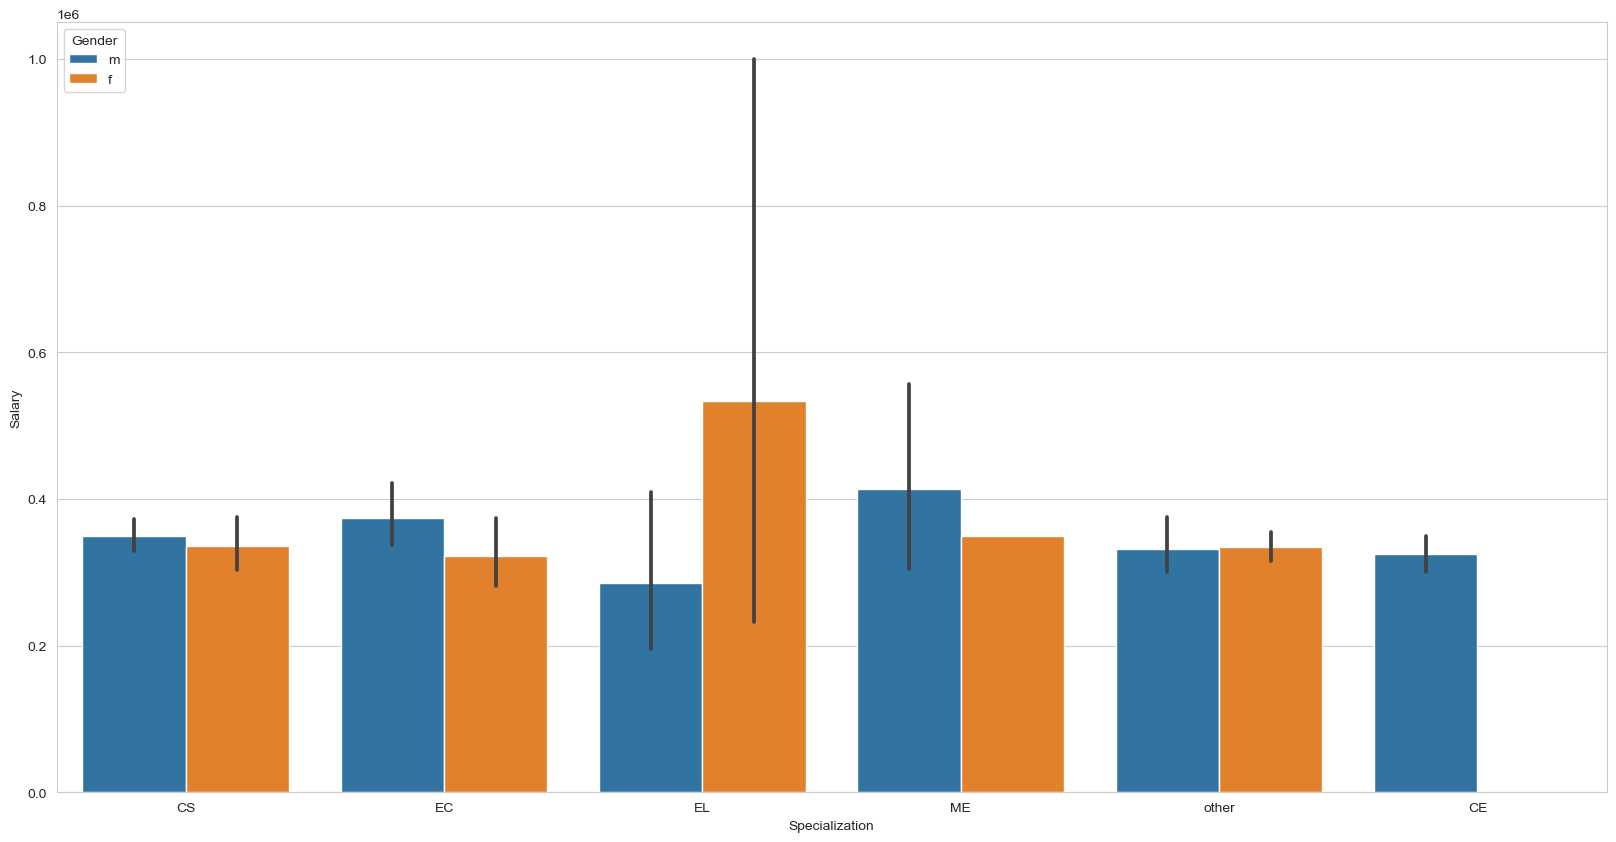

In [92]:
# for the dataset containing Highpaying Jobs
plt.figure(figsize=(20,10))
sns.barplot(data=high_pay,x='Specialization',y='Salary',hue='Gender')

- This is for the people who have higher pays.
- From the CE Specialization,Only men are taking up higher pay jobs.
- Mostly specialization is not the reason for women being paid less becuase as we say bulk of people are from cs and for cs men and women earn similar.

## Overall Insights from the Exploratory Data Analysis :
- Most of Amcat Aspirants are male working in IT domain with an experience of around 5years with degree in B tech and specialization in Computer Science/Information Technology from tier-2 college in uttarpradesh with an average salary around 300k.
- High paying jobs taken up by amcat aspirants are mostly from 'IT' Domain.
- Software Engineer and Software Developer are the most aimed profession for amcat aspirants.

## Let us verify claims by Testing the Hypothesis

### Is there a relationship between gender and specialization? (i.e. Does the preference of Specialization depend on the Gender?)

<Axes: xlabel='Designation', ylabel='Salary'>

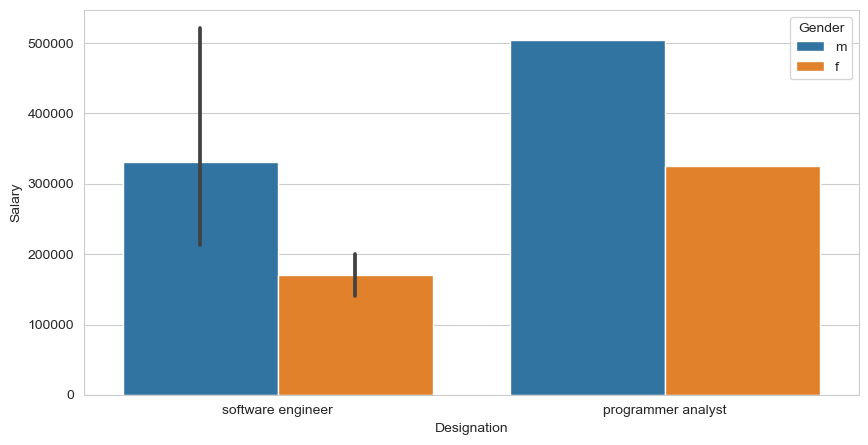

In [93]:
data=df[(df["Designation"].isin(["programmer analyst","software engineer","hardware engineer","associate engineer"])) & (df["Experience"]==0)]
plt.figure(figsize=(10,5))
sns.barplot(x="Designation",y="Salary",hue="Gender",data=data)

- For Freshers,the salary is starting from 200000 and male are earing more than female as a fresher.

## 1 sample T-test to verify the claim
- Null Hypothesis: mu = 275k
- Alternate Hypothesis : mu != 275k

In [94]:
# Import the t-test function from the scipy stats module
from scipy import stats as st

# Calculate the population mean
popmean = 250000 + 300000 / 2

# Perform the t-test and extract the p-value
pv = st.ttest_1samp(data['Salary'], popmean=popmean)[1]

# Set the significance level (alpha) for the test
alpha = 0.05

# Determine whether to reject or fail to reject the null hypothesis
if pv < alpha:
    print('We reject the null hypothesis and Average salary is not equal to 250k')
else:
    print('We fail to reject null hypothesis and Average salary is equal to 250k')

We fail to reject null hypothesis and Average salary is equal to 250k


## Chi-Square Test to check the relation between Specialization and Gender.
- Null Hypothesis: Gender does not impact specialization
- Alternate Hypothesis : Gender impacts specialization

In [95]:
# Import the chi-square test function from the scipy stats module
from scipy.stats import chi2_contingency as cst

# Create a contingency table for gender and specialization
sample_columns = pd.crosstab(df['Gender'], df['Specialization'], margins=True)

# Perform the chi-square test and extract the p-value
pv = cst(sample_columns)[1]

# Set the significance level (alpha) for the test
alpha = 0.05

# Determine whether to reject or fail to reject the null hypothesis
if pv < alpha:
    print('We reject the null hypothesis and Gender impacts specialization')
else:
    print('We fail to reject null hypothesis and Gender does not impact specialization')

We reject the null hypothesis and Gender impacts specialization


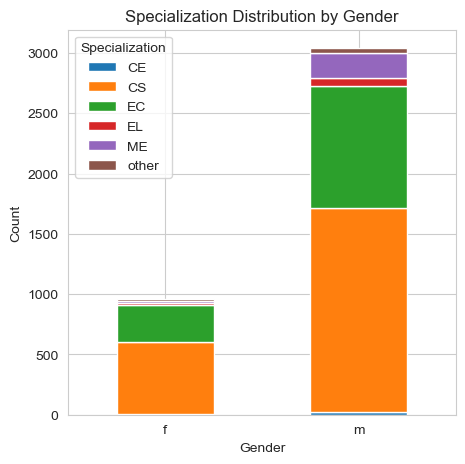

In [96]:

observed = pd.crosstab(df['Gender'], df['Specialization'])

# Plotting the stacked bar plot
observed.plot(kind='bar', stacked=True, figsize=(5, 5))
plt.title('Specialization Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotating x-axis labels for better readability
plt.legend(title='Specialization')
plt.show()


- There are more men than woman in all the  Specialization categories.
- Most of the Amcat Aspirants are from CS&EC specialization.

## So,The above made claims are True, the preference of Specialisation depends upon the Gender

## Bonus Question -
### What is the Average salary for each CollegeTier. if there is any relationship between CollegeTier and Salary.

In [97]:
# Calculating average salary for each CollegeTier
average_salary_by_tier= df.groupby('CollegeTier')['Salary'].mean()

for tier, salary in average_salary_by_tier.items():
    print("Average Salary for Tier1 {}: {:.2f}".format(tier, salary))

Average Salary for Tier1 1: 442356.90
Average Salary for Tier1 2: 296893.81


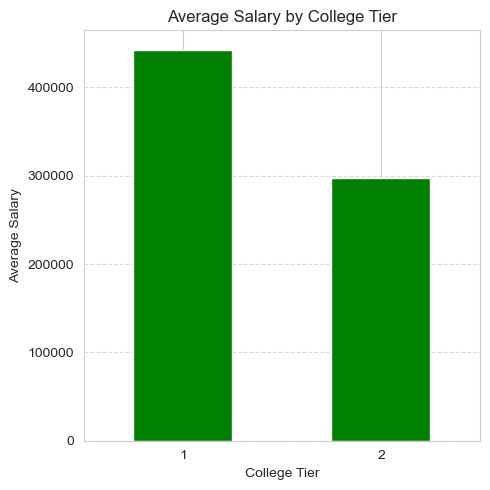

In [98]:
# Calculating average salary for each CollegeTier
average_salary_by_tier = df.groupby('CollegeTier')['Salary'].mean()

# Plotting
plt.figure(figsize=(5, 5))
average_salary_by_tier.plot(kind='bar', color='green')
plt.title('Average Salary by College Tier')
plt.xlabel('College Tier')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- In the above plot we can see the Average salary earned by the College Tier 1 is Higher than the College Tier 2.
- Average salary of Tier1 is 442356 and for Tier2 is 296893.

## Is there any relationship between CollegeTier and Salary.

In [99]:
from scipy.stats import f_oneway

# Extract salaries for each college tier
college_tiers = df['CollegeTier'].unique()
salary_by_college_tier = [df[df['CollegeTier'] == tier]['Salary'] for tier in college_tiers]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*salary_by_college_tier)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant relationship between CollegeTier and Salary.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant relationship between CollegeTier and Salary.")


Reject the null hypothesis.
There is a significant relationship between CollegeTier and Salary.


<Axes: xlabel='CollegeTier', ylabel='Salary'>

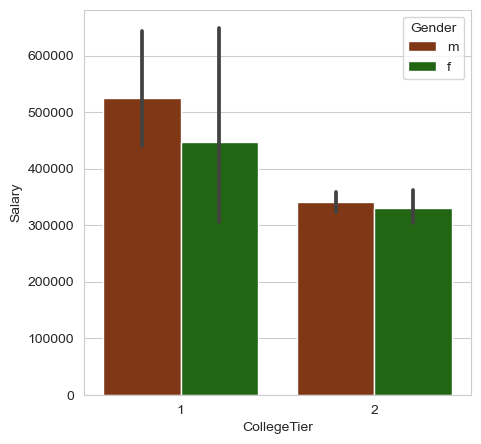

In [100]:
### Lets us check salary with the College Tier
plt.figure(figsize=(5,5))
custom_palette = {'m': '#913104', 'f': '#197307'}
sns.barplot(data=high_pay,x='CollegeTier',y='Salary',hue='Gender', palette=custom_palette)

In [101]:
df.groupby('CollegeTier').Gender.value_counts()

CollegeTier  Gender
1            m          246
             f           51
2            m         2795
             f          906
Name: Gender, dtype: int64

In [102]:
data1 = df.groupby('CollegeTier').Gender.value_counts()

<Figure size 800x600 with 0 Axes>

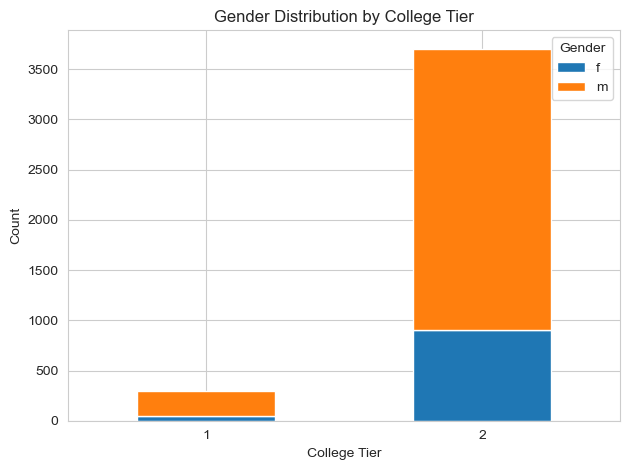

In [103]:
# Grouping by CollegeTier and Gender and getting the counts
data1 =df.groupby('CollegeTier')['Gender'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
data1.unstack().plot(kind='bar', stacked=True)
plt.title('Gender Distribution by College Tier')
plt.xlabel('College Tier')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

- From the above bar graph,we can see that students from tier1 colleges have higher salary.
- We can see more men are from tier1 colleges than women and overall most of the students are from tier2 colleges.
- This might be a reason for women being paid less than men in high paying jobs because as most of women are from tier-2 colleges